# Create Combined Dataframe

#### Advantages of Having a Combined Dataset for EDA

Having a combined dataset in the data cleaning phase, offers several advantages for the **Exploratory Data Analysis (EDA)** process:

1. **Comprehensive Analysis:** Combining multiple datasets allows for a more comprehensive analysis of the variables and their relationships. It provides a holistic view of the data, enabling the identification of patterns and trends that may not be apparent when analyzing individual datasets separately. This comprehensive analysis can lead to more accurate and meaningful insights.

2. **Enhanced Data Integrity:** By merging multiple datasets into a combined dataframe, it becomes easier to address data integrity issues. Inconsistencies, missing values, or outliers. Outliers present in separate datasets can be better identified and resolved when they are all integrated into a single dataset. This enhances the overall data quality and reliability, enabling more robust analysis during the EDA process.

3. **Efficient Data Exploration:** Having a combined dataset simplifies the exploration process. Instead of switching between different datasets, analysts can focus on a single consolidated dataset, reducing the need for repetitive data manipulation and merging operations. This efficiency allows for more time to be spent on actual analysis, hypothesis testing, and uncovering meaningful insights.

4. **Increased Statistical Power:** Combining datasets increases the statistical power of the analysis. With a larger sample size, there is a greater ability to detect significant relationships, correlations, or patterns within the data. This leads to more reliable and accurate conclusions and allows for more confident decision-making.

5. **Contextual Understanding:** A combined dataset enables the incorporation of relevant contextual information. For example, merging crime data with COVID-19 statistics in Italy would provide a broader context for understanding potential relationships between the two variables. This contextual understanding is crucial for generating insights that go beyond isolated data points and help explain the interdependencies between different factors.

In summary, having a combined dataset for EDA offers advantages such as comprehensive analysis, enhanced data integrity, efficient exploration, increased statistical power, and contextual understanding. It facilitates a more robust and meaningful analysis, enabling researchers to gain valuable insights into the impact of COVID-19 on crime in Italy.

## Data Sets
For the purpose of this project, we will be looking at the following datasets:  
- Covid-19 data from [Dipartimento della Protezione Civile (DPC)](https://www.protezionecivile.gov.it/en/) - External Link
    - [dati-regioni](../../data/Covid/dati-regioni/') - Internal Link
- Crime data from [Istat](https://www.istat.it/en/) - External Link
    - [crime_type_by_year_cleaned.csv](../../data/crime_type_by_year_cleaned.csv) - Internal Link
- Unemployment data from [Istat](https://www.istat.it/en/) - External Link
    - [Unemployment_by_Region_clean.csv](../../data/Unemployment_by_Region_clean.csv) - Internal Link
- Population data from [Istat](https://www.istat.it/en/) - External Link
    - [Unemployment_by_Region_clean.csv](../../data/Unemployment_by_Region_clean.csv) - Internal Link

## Data Specifications
- Years: 2017 - 2021
- Regions: 
    1. Piemonte
    2. Valle d'Aosta/Vallée dAoste
    3. Lombardia
    4. Trentino-Alto Adige/Südtirol
    5. Veneto
    6. Friuli-Venezia Giulia
    7. Liguria
    8. Emilia-Romagna
    9. Toscana
    10. Umbria
    11. Marche
    12. Lazio
    13. Abruzzo
    14. Molise
    15. Campania
    16. Puglia
    17. Basilicata
    18. Calabria
    19. Sicilia
    20. Sardegna
- Column Names: All lowercase with underscores in place of spaces

## The Data

#### Import dependencies.

In [473]:
import pandas as pd
import numpy as np
import os
import json
import warnings
from datetime import datetime
import geopandas as gpd
import matplotlib.pyplot as plt
# import matplotlib.colors as colors
# import matplotlib.cm as cm
# from matplotlib.animation import FuncAnimation
# import cartopy.crs as ccrs
import seaborn as sns
import plotly.express as px
# import plotly.subplots as sp
# import plotly.graph_objects as go
# import plotly.io as pio

# Set pandas options
pd.set_option('display.max_columns', None)

# Set environment variables
os.environ['OMP_NUM_THREADS'] = '1'

Data is stored in the `data` folder. The `data` folder is located in the root directory of the project.

In [306]:
# specify the path where the csv files are located
path = '../../data/Covid/dati-regioni/' # Folder containing individual csv files
crime_url = '../../data/crime_type_by_year_cleaned.csv'
unemp_url = '../../data/Unemployment_by_Region_clean.csv'
pop_url = '../../data/population_data_2019_23.csv'
reg_sim_url ='../../data/geo_data/regions_simplified.geojson'

## Functions

Lets create a function that will allow us to read in the data from the csv files and create a dataframe.

In [307]:
def load_df(csv_url):
    """
    Load a csv file into a pandas dataframe

    Args:
        csv_url (str): url of the csv file to load

    Returns:
        dataframe: returns a pandas dataframe
    """
    return pd.read_csv(csv_url)

Lets create a function to count the unique values in each column.

In [308]:
def col_unique_count(data):
    """
    Function to print the unique values in each column.

    Args:
        data (DataFrame): DataFrame containing the data.
    """
    print('-' * 30)  # Separator top row
    for col in data.columns:
        values_length = len(data[col].unique())  # Get the length of unique values
    
        # Print the column name and length
        print('Column Name:', col)
        print('Length of Unique Values:', values_length)
        
        print('-' * 30)  # Separator between rows

Lets create a function to take a look at the columns whose unique values are important to our analysis.

In [309]:
def col_unique_vals(data, col_names):
    """
    Function to print the unique values in each column of interest.

    Args:
        data (Dataframe): Dataframe containing the data.
        column_names (str): list of column names to check.
    """
    print('-' * 30)  # Separator top row
    # Iterate through each column
    for col in data[col_names]:
        unique_values = data[col].unique()  # Get unique values
        
        # Print the column name, length, and unique values
        print('Column Name:', col)
        print('Unique Values:')
        
        for value in unique_values:
            print(value)
        
        print('-' * 30)  # Separator between rows

## Covid-19 Data
Covid-19 data refers to information related to the spread, impact, and management of the novel coronavirus disease. It includes data on confirmed cases, testing, demographics, geographical distribution, time series trends, and public health measures. This data is crucial for monitoring the pandemic, informing decision-making, and evaluating interventions.  
  
For the purpose of this notebook, we will be looking at the total number of confirmed cases across the Regions of Italy.

### Aggregated Covid-19 Data from GitHub

The **csv** data is spread across separate files by month.  
  
We can use **os** to open, read, and collate the data into a single dataframe.

In [310]:
# get a list of all the csv files in the folder
files = os.listdir(path)

In [311]:
# create an empty list to store the dataframes
dataframes = []

# loop through each csv file and append its contents to the list of dataframes
for file in files:
    if file.endswith('.csv'):
        filepath = os.path.join(path, file)
        df = pd.read_csv(filepath)
        dataframes.append(df)

# concatenate all the dataframes together
covid_df = pd.concat(dataframes, ignore_index=True)

Lets take a look at the dataframe.

In [312]:
covid_df.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN,NaN,0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN,NaN,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,NaN,NaN,0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,0,18,0,0,NaN,NaN,18,148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Lets explore the data.  
  
First we can check the `shape` of the dataframe.

#### Shape

In [313]:
print(f'We have {covid_df.shape[0]} rows and {covid_df.shape[1]} columns')

We have 24486 rows and 30 columns


#### Columns
Lets have a look at the column names using `columns`.

In [314]:
covid_cols = covid_df.columns.to_list()
cols_len = len(covid_cols)
print(f'The columns are:\n\n {covid_cols}\n\n There are {cols_len} columns')

The columns are:

 ['data', 'stato', 'codice_regione', 'denominazione_regione', 'lat', 'long', 'ricoverati_con_sintomi', 'terapia_intensiva', 'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi', 'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti', 'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening', 'totale_casi', 'tamponi', 'casi_testati', 'note', 'ingressi_terapia_intensiva', 'note_test', 'note_casi', 'totale_positivi_test_molecolare', 'totale_positivi_test_antigenico_rapido', 'tamponi_test_molecolare', 'tamponi_test_antigenico_rapido', 'codice_nuts_1', 'codice_nuts_2']

 There are 30 columns


#### Info()

Using `.info()` will help us identify the data types, size of the data, and any `Null` values.

In [315]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24486 entries, 0 to 24485
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   data                                    24486 non-null  object 
 1   stato                                   24486 non-null  object 
 2   codice_regione                          24486 non-null  int64  
 3   denominazione_regione                   24486 non-null  object 
 4   lat                                     24486 non-null  float64
 5   long                                    24486 non-null  float64
 6   ricoverati_con_sintomi                  24486 non-null  int64  
 7   terapia_intensiva                       24486 non-null  int64  
 8   totale_ospedalizzati                    24486 non-null  int64  
 9   isolamento_domiciliare                  24486 non-null  int64  
 10  totale_positivi                         24486 non-null  in

There are some `Null` values in the data, we will deal with the `Null` values as we go along.

#### Describe()

Using `describe()` will help us understand the numerical values in the data. 
  
Lets only look at the numerical data, excluding any `'dates'`, `'codes'` and `'geo'` data.

In [316]:
covid_df[[
    'ricoverati_con_sintomi', 'terapia_intensiva',
    'totale_ospedalizzati', 'isolamento_domiciliare',
    'totale_positivi', 'variazione_totale_positivi',
    'nuovi_positivi', 'dimessi_guariti', 'deceduti',
    'casi_da_sospetto_diagnostico', 'casi_da_screening',
    'totale_casi', 'tamponi', 'casi_testati',
    'ingressi_terapia_intensiva', 'totale_positivi_test_molecolare',
    'totale_positivi_test_antigenico_rapido',
    'tamponi_test_molecolare', 'tamponi_test_antigenico_rapido'
    ]].describe()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,ingressi_terapia_intensiva,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
count,24486.000000,24486.000000,24486.000000,24486.000000,24486.000000,24486.000000,24486.000000,2.448600e+04,24486.000000,3402.000000,3402.00000,2.448600e+04,2.448600e+04,2.333100e+04,18543.000000,1.764000e+04,1.764000e+04,1.764000e+04,1.764000e+04
mean,463.969983,44.780528,508.750510,21598.353345,22107.103610,5.118517,1041.701299,4.431715e+05,5659.167198,16472.772193,6319.39565,4.709378e+05,5.876708e+06,1.797052e+06,2.969638,3.286428e+05,3.147168e+05,3.636032e+06,4.344032e+06
std,871.306552,96.567591,962.934311,41110.278674,41513.129374,2053.651905,2390.960314,7.094805e+05,7844.665291,32188.413270,15054.35195,7.319840e+05,8.522851e+06,2.145636e+06,5.626426,3.482502e+05,4.868369e+05,3.669912e+06,5.881339e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,-50797.000000,-229.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,3.482000e+03,-2.000000,7.382000e+03,0.000000e+00,6.615200e+04,0.000000e+00
25%,50.000000,3.000000,55.000000,1117.250000,1228.250000,-94.000000,51.000000,1.656300e+04,690.000000,2052.250000,117.00000,2.676975e+04,4.651948e+05,2.962550e+05,0.000000,7.012275e+04,1.341750e+03,8.764492e+05,4.172398e+05
50%,180.000000,13.000000,195.000000,6248.500000,6505.500000,2.000000,255.000000,1.162020e+05,2568.000000,5290.500000,1493.00000,1.476730e+05,2.369642e+06,8.715680e+05,1.000000,2.021700e+05,7.222150e+04,2.195741e+06,2.100065e+06
75%,498.000000,41.000000,540.000000,22905.000000,23701.250000,116.000000,998.750000,4.775922e+05,8307.750000,19285.750000,5469.00000,5.118028e+05,6.905588e+06,2.585904e+06,3.000000,4.925005e+05,3.886198e+05,5.062436e+06,5.293302e+06
max,12077.000000,1381.000000,13328.000000,574548.000000,578257.000000,47483.000000,52693.000000,4.106068e+06,45898.000000,305002.000000,113150.00000,4.154840e+06,4.558697e+07,1.115291e+07,86.000000,1.539511e+06,2.615329e+06,1.709782e+07,2.848915e+07


#### Column Unique Values
Lets create a function to check the unique values in each column.

In [317]:
col_unique_count(covid_df)

------------------------------
Column Name: data
Length of Unique Values: 1166
------------------------------
Column Name: stato
Length of Unique Values: 1
------------------------------
Column Name: codice_regione
Length of Unique Values: 21
------------------------------
Column Name: denominazione_regione
Length of Unique Values: 21
------------------------------
Column Name: lat
Length of Unique Values: 21
------------------------------
Column Name: long
Length of Unique Values: 22
------------------------------
Column Name: ricoverati_con_sintomi
Length of Unique Values: 2672
------------------------------
Column Name: terapia_intensiva
Length of Unique Values: 598
------------------------------
Column Name: totale_ospedalizzati
Length of Unique Values: 2871
------------------------------
Column Name: isolamento_domiciliare
Length of Unique Values: 15288
------------------------------
Column Name: totale_positivi
Length of Unique Values: 15618
------------------------------
Column 

In [318]:
col_unique_vals(covid_df, ['denominazione_regione', 'codice_nuts_1', 'codice_nuts_2'])

------------------------------
Column Name: denominazione_regione
Unique Values:
Abruzzo
Basilicata
Calabria
Campania
Emilia-Romagna
Friuli Venezia Giulia
Lazio
Liguria
Lombardia
Marche
Molise
P.A. Bolzano
P.A. Trento
Piemonte
Puglia
Sardegna
Sicilia
Toscana
Umbria
Valle d'Aosta
Veneto
------------------------------
Column Name: codice_nuts_1
Unique Values:
nan
ITF
ITH
ITI
ITC
ITG
------------------------------
Column Name: codice_nuts_2
Unique Values:
nan
ITF1
ITF5
ITF6
ITF3
ITH5
ITH4
ITI4
ITC3
ITC4
ITI3
ITF2
ITH1
ITH2
ITC1
ITF4
ITG2
ITG1
ITI1
ITI2
ITC2
ITH3
------------------------------


There are some abnormalities in the place names.  
- `'P.A. Bolzano'` and `'P.A. Trento'` are a subset of `'Trentino-Alto Adige/Südtirol'` region
- The `covid_df` dataframe is missing `'Trentino Alto Adige / Südtirol'`
- `'Friuli Venezia Giulia'` is missing a hyphen and `'Valle d'Aosta'` is incorrect
  
We will fix these abnormalities later.

#### Column Names

Lets explore the column names using the list we created earlier (`covid_cols`), with a view to dropping any columns that are not required.

In [319]:
covid_cols

['data',
 'stato',
 'codice_regione',
 'denominazione_regione',
 'lat',
 'long',
 'ricoverati_con_sintomi',
 'terapia_intensiva',
 'totale_ospedalizzati',
 'isolamento_domiciliare',
 'totale_positivi',
 'variazione_totale_positivi',
 'nuovi_positivi',
 'dimessi_guariti',
 'deceduti',
 'casi_da_sospetto_diagnostico',
 'casi_da_screening',
 'totale_casi',
 'tamponi',
 'casi_testati',
 'note',
 'ingressi_terapia_intensiva',
 'note_test',
 'note_casi',
 'totale_positivi_test_molecolare',
 'totale_positivi_test_antigenico_rapido',
 'tamponi_test_molecolare',
 'tamponi_test_antigenico_rapido',
 'codice_nuts_1',
 'codice_nuts_2']

Lets remove the columns that are not required.

In [320]:
# Define the columns to drop
columns_to_drop = [
    'ricoverati_con_sintomi',
    'terapia_intensiva',
    'totale_ospedalizzati',
    'isolamento_domiciliare',
    'totale_positivi',
    'variazione_totale_positivi',
    'nuovi_positivi',
    'dimessi_guariti',
    'deceduti',
    'casi_da_sospetto_diagnostico',
    'casi_da_screening',
    'tamponi',
    'casi_testati',
    'note',
    'ingressi_terapia_intensiva',
    'note_test',
    'note_casi',
    'totale_positivi_test_molecolare',
    'totale_positivi_test_antigenico_rapido',
    'tamponi_test_molecolare',
    'tamponi_test_antigenico_rapido',
    'codice_nuts_1',
    'codice_nuts_2'
]

# Drop the columns that are not needed
covid_df.drop(columns_to_drop, axis=1, inplace=True)
covid_df.head()


,data,stato,codice_regione,denominazione_regione,lat,long,totale_casi
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,18


We can now translate the column names from **Italian** to **English**.

In [321]:
# Use a dictionary to rename the columns
covid_df = covid_df.rename(columns={
    'data': 'date', 'stato': 'state', 'codice_regione': 'reg_istat_code', 'denominazione_regione': 'reg_name',
    'long': 'lon', 'totale_casi': 'covid_cases'
    })
covid_df.head()

,date,state,reg_istat_code,reg_name,lat,lon,covid_cases
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,18


Convert `date` column to `Datetime` format.

In [322]:
covid_df['date'] = pd.to_datetime(covid_df['date'])

The data is on a daily basis. To make the data more manageable we can group the data by `year`, `month`, `week`, and `day_of_week`.  
  
Day of week:
- 0 = Monday
- 1 = Tuesday
- 2 = Wednesday
- 3 = Thursday
- 4 = Friday
- 5 = Saturday
- 6 = Sunday

In [323]:
# Create a year and month column
covid_df['year'] = covid_df['date'].dt.year
covid_df['month'] = covid_df['date'].dt.month
covid_df['week'] = covid_df['date'].dt.isocalendar().week
covid_df['day_of_week'] = covid_df['date'].dt.dayofweek
covid_df

,date,state,reg_istat_code,reg_name,lat,lon,covid_cases,year,month,week,day_of_week
0,2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,2020,2,9,0
1,2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,2020,2,9,0
2,2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,2020,2,9,0
3,2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,2020,2,9,0
4,2020-02-24 18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,18,2020,2,9,0
...,...,...,...,...,...,...,...,...,...,...,...
24481,2023-05-04 17:00:00,ITA,19,Sicilia,38.115697,13.362357,1825465,2023,5,18,3
24482,2023-05-04 17:00:00,ITA,9,Toscana,43.769231,11.255889,1601530,2023,5,18,3
24483,2023-05-04 17:00:00,ITA,10,Umbria,43.106758,12.388247,442756,2023,5,18,3
24484,2023-05-04 17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,50802,2023,5,18,3


Lets check data types.

In [324]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24486 entries, 0 to 24485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            24486 non-null  datetime64[ns]
 1   state           24486 non-null  object        
 2   reg_istat_code  24486 non-null  int64         
 3   reg_name        24486 non-null  object        
 4   lat             24486 non-null  float64       
 5   lon             24486 non-null  float64       
 6   covid_cases     24486 non-null  int64         
 7   year            24486 non-null  int32         
 8   month           24486 non-null  int32         
 9   week            24486 non-null  UInt32        
 10  day_of_week     24486 non-null  int32         
dtypes: UInt32(1), datetime64[ns](1), float64(2), int32(3), int64(2), object(2)
memory usage: 1.7+ MB


Lets check the total number of cases.  
  
We can do this by grouping the `date` and summing the `covid_cases`.

In [325]:
end_date = covid_df['date'].iloc[-1].strftime('%d-%m-%Y')
covid_total = covid_df.loc[covid_df['date'] == covid_df['date'].iloc[-1], 'covid_cases'].sum()
print(f'As of {end_date}, the total number of cases in Italy was {covid_total:,}.')

As of 04-05-2023, the total number of cases in Italy was 25,809,208.


#### Total Cases by Region
Lets plot the total number of cases by region based on a 'day_of_week' filter.

In [326]:
def plot_covid_regions(data, day_of_week=4):
    """
    Function to plot the number of cases by region for a given day of the week.

    Args:
        data (DataFrame): DataFrame containing the data.
        day_of_week (int, optional): Day of the week as an integer (Monday=1, Tuesday=2,
            Wednesday=3, Thursday=4, Friday=5, Saturday=6). Defaults to 4.
    """
    # Create a dictionary that maps numbers to day names
    day_mapping = {
        1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
        4: 'Thursday', 5: 'Friday', 6: 'Saturday'
    }

    # Filter the data based on the day of the week
    filtered_data = data[data['day_of_week'] == day_of_week]

    # Rename the columns for hover data
    filtered_data = filtered_data.rename(columns={'reg_name': 'Region', 'date': 'Date', 'covid_cases': 'Total Cases'})

    # Plot the data using Plotly Express
    fig = px.line(filtered_data, x='Date', y='Total Cases', color='Region',
                hover_data={'Date': '|%B %d, %Y', 'Total Cases': ':,'})

    # Set plot layout
    fig.update_layout(
        title=f'Total Cases on each {day_mapping[day_of_week]} by Month',
        xaxis_title='Date',
        yaxis_title='Total Cases',
        width=1200,
        height=800,
        font=dict(
            family='Arial',
            size=18,
            color='Purple'
        )
    )

    # Show the plot
    fig.show()

In [327]:
plot_covid_regions(covid_df)

In [328]:
# Filter the data for Fridays
covid_df_thur = covid_df[covid_df['day_of_week'] == 4]
covid_df_thur

,date,state,reg_istat_code,reg_name,lat,lon,covid_cases,year,month,week,day_of_week
84,2020-02-28 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,1,2020,2,9,4
85,2020-02-28 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,2020,2,9,4
86,2020-02-28 18:00:00,ITA,18,Calabria,38.905976,16.594402,1,2020,2,9,4
87,2020-02-28 18:00:00,ITA,15,Campania,40.839566,14.250850,4,2020,2,9,4
88,2020-02-28 18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,145,2020,2,9,4
...,...,...,...,...,...,...,...,...,...,...,...
24355,2023-04-28 17:00:00,ITA,19,Sicilia,38.115697,13.362357,1824867,2023,4,17,4
24356,2023-04-28 17:00:00,ITA,9,Toscana,43.769231,11.255889,1600536,2023,4,17,4
24357,2023-04-28 17:00:00,ITA,10,Umbria,43.106758,12.388247,442349,2023,4,17,4
24358,2023-04-28 17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,50778,2023,4,17,4


We need to create a time series set of `'Covid-19'` data that will match our dataset specifications of 2017 to 2021.

In [329]:
# Create a date range
date1 = datetime(2020,2,24)
date2 = datetime(2021,12,31)
# Filter the data based on the date range
covid_df_dates = covid_df_thur[(covid_df_thur['date'] >= date1) & (covid_df_thur['date'] <= date2)].reset_index(drop=True)

In [330]:
covid_df_dates

,date,state,reg_istat_code,reg_name,lat,lon,covid_cases,year,month,week,day_of_week
0,2020-02-28 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,1,2020,2,9,4
1,2020-02-28 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,2020,2,9,4
2,2020-02-28 18:00:00,ITA,18,Calabria,38.905976,16.594402,1,2020,2,9,4
3,2020-02-28 18:00:00,ITA,15,Campania,40.839566,14.250850,4,2020,2,9,4
4,2020-02-28 18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,145,2020,2,9,4
...,...,...,...,...,...,...,...,...,...,...,...
2011,2021-12-24 17:00:00,ITA,19,Sicilia,38.115697,13.362357,350236,2021,12,51,4
2012,2021-12-24 17:00:00,ITA,9,Toscana,43.769231,11.255889,327770,2021,12,51,4
2013,2021-12-24 17:00:00,ITA,10,Umbria,43.106758,12.388247,74632,2021,12,51,4
2014,2021-12-24 17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,14725,2021,12,51,4


Lets plot our new dataframe.

In [331]:
plot_covid_regions(covid_df_dates)

Lets group the data by `region` and `reg_code` and return the `max` value of `covid_cases` for **2020** and **2021**, in a new dataframe.

In [332]:
# Create a dataframe with the total cases by region
covid_totals = covid_df[covid_df['year'].isin([2020, 2021])].groupby(['reg_name', 'lat', 'lon', 'reg_istat_code', 'year'])['covid_cases'].max().reset_index()
covid_totals

,reg_name,lat,lon,reg_istat_code,year,covid_cases
0,Abruzzo,42.351222,13.398438,13,2020,35314
1,Abruzzo,42.351222,13.398438,13,2021,106573
2,Basilicata,40.639471,15.805148,17,2020,10826
3,Basilicata,40.639471,15.805148,17,2021,36295
4,Calabria,38.905976,16.594402,18,2020,23920
5,Calabria,38.905976,16.594402,18,2021,111746
6,Campania,40.839566,14.250850,15,2020,189673
7,Campania,40.839566,14.250850,15,2021,583262
8,Emilia-Romagna,44.494367,11.341721,8,2020,171512
9,Emilia-Romagna,44.494367,11.341721,8,2021,536922


We have a double up on `'Sicilia'`, lets delete the second ones.

In [333]:
covid_totals = covid_totals[~(
    (covid_totals['reg_name'] == 'Sicilia') &
    ((covid_totals['covid_cases'] == 3080) |
    (covid_totals['covid_cases'] == 216416))
    )]

In [334]:
covid_totals[covid_totals['reg_name'] == 'Sicilia']

,reg_name,lat,lon,reg_istat_code,year,covid_cases
32,Sicilia,38.115697,13.362357,19,2020,93644
35,Sicilia,38.115697,13.362357,19,2021,372604


Lets correct the anomalies in the `reg_name` column.  
  
Lets remind ourselves of the issues.

In [335]:
col_unique_vals(covid_totals, ['reg_name'])

------------------------------
Column Name: reg_name
Unique Values:
Abruzzo
Basilicata
Calabria
Campania
Emilia-Romagna
Friuli Venezia Giulia
Lazio
Liguria
Lombardia
Marche
Molise
P.A. Bolzano
P.A. Trento
Piemonte
Puglia
Sardegna
Sicilia
Toscana
Umbria
Valle d'Aosta
Veneto
------------------------------


In [336]:
covid_totals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 0 to 43
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reg_name        42 non-null     object 
 1   lat             42 non-null     float64
 2   lon             42 non-null     float64
 3   reg_istat_code  42 non-null     int64  
 4   year            42 non-null     int32  
 5   covid_cases     42 non-null     int64  
dtypes: float64(2), int32(1), int64(2), object(1)
memory usage: 2.1+ KB


Lets fix the issues.  
  
Correct the place names.

In [337]:
covid_totals.loc[covid_totals['reg_name'] == 'Friuli Venezia Giulia', 'reg_name'] = 'Friuli-Venezia Giulia'
covid_totals.loc[covid_totals['reg_name'] == "Valle d'Aosta", 'reg_name'] = "Valle d'Aosta/Vallée d'Aoste"

Merge and create the new place name.

In [338]:
covid_totals = covid_totals.copy()
# Replace the 'reg_name' values
covid_totals['reg_name'] = covid_totals['reg_name'].replace(['P.A. Bolzano', 'P.A. Trento'], 'Trentino-Alto Adige/Südtirol')

# Replace the 'reg_istat_code' values
covid_totals.loc[covid_totals['reg_name'] == 'Trentino-Alto Adige/Südtirol', 'reg_istat_code'] = 4

# Replace the 'reg_istat_code' values
covid_totals.loc[covid_totals['reg_name'] == 'Trentino-Alto Adige/Südtirol', 'lat'] = 46.6531833

# Replace the 'reg_istat_code' values
covid_totals.loc[covid_totals['reg_name'] == 'Trentino-Alto Adige/Südtirol', 'lon'] = 10.7689857

# Group by 'reg_name' and 'year', and sum 'totale_casi'
covid_totals = covid_totals.groupby(['reg_name', 'lat', 'lon', 'reg_istat_code', 'year'], as_index=False)['covid_cases'].sum()

covid_totals[covid_totals['reg_name'] == 'Trentino-Alto Adige/Südtirol']

,reg_name,lat,lon,reg_istat_code,year,covid_cases
32,Trentino-Alto Adige/Südtirol,46.653183,10.768986,4,2020,51334
33,Trentino-Alto Adige/Südtirol,46.653183,10.768986,4,2021,163832


Lets check the results.

In [339]:
col_unique_vals(covid_totals, ['reg_name', 'reg_istat_code'])

------------------------------
Column Name: reg_name
Unique Values:
Abruzzo
Basilicata
Calabria
Campania
Emilia-Romagna
Friuli-Venezia Giulia
Lazio
Liguria
Lombardia
Marche
Molise
Piemonte
Puglia
Sardegna
Sicilia
Toscana
Trentino-Alto Adige/Südtirol
Umbria
Valle d'Aosta/Vallée d'Aoste
Veneto
------------------------------
Column Name: reg_istat_code
Unique Values:
13
17
18
15
8
6
12
7
3
11
14
1
16
20
19
9
4
10
2
5
------------------------------


Lets now add the extra rows for the missing years.  
  
We can assume the values of `covid_cases` for 2017, 2018, and 2019 are **0**, as Covid-19 was not present in the world in those years.

In [340]:
# Create a list of dictionaries to add the missing years
new_rows = []
for _, row in covid_totals.drop_duplicates('reg_name').iterrows():
    for year in [2017, 2018, 2019]:
        new_row = {'reg_name': row['reg_name'], 'lat': row['lat'], 'lon': row['lon'],'reg_istat_code': row['reg_istat_code'], 'year': year, 'covid_cases': 0}
        new_rows.append(new_row)

# Create a dataframe from the list of dictionaries
new_rows_covid_totals = pd.DataFrame(new_rows)
# Append the new rows to the covid_totals dataframe
covid_totals = pd.concat([covid_totals, new_rows_covid_totals])
# Sort the dataframe by region name and year
covid_totals.sort_values(by=['reg_name', 'year'], inplace=True)
# Reset the index
covid_totals.reset_index(drop=True, inplace=True)
covid_totals

,reg_name,lat,lon,reg_istat_code,year,covid_cases
0,Abruzzo,42.351222,13.398438,13,2017,0
1,Abruzzo,42.351222,13.398438,13,2018,0
2,Abruzzo,42.351222,13.398438,13,2019,0
3,Abruzzo,42.351222,13.398438,13,2020,35314
4,Abruzzo,42.351222,13.398438,13,2021,106573
...,...,...,...,...,...,...
95,Veneto,45.434905,12.338452,5,2017,0
96,Veneto,45.434905,12.338452,5,2018,0
97,Veneto,45.434905,12.338452,5,2019,0
98,Veneto,45.434905,12.338452,5,2020,253875


## Crime Data

### Crime Data across Italy by Region

Crime data refers to information collected and recorded regarding criminal activities that occur within a specific jurisdiction or region.  
It includes various types of data related to criminal incidents, offenders, victims, and law enforcement activities.  
Crime data is essential for understanding patterns, trends, and the overall nature of criminal behavior.  
  
The data is in a **csv** file. Lets create a new **dataframe** from the **csv** file.

In [341]:
crime_df = load_df(crime_url)
crime_df

,Territory_Code,Territory_Name,REATIPS_VICES,Crime_Type,Year,Number_of_Crime
0,IT,Italy,MASSMURD,mass murder,2017,17
1,IT,Italy,MASSMURD,mass murder,2018,20
2,IT,Italy,MASSMURD,mass murder,2019,14
3,IT,Italy,MASSMURD,mass murder,2020,29
4,IT,Italy,MASSMURD,mass murder,2021,29
...,...,...,...,...,...,...
36979,ITG12,Palermo,USURY,usury,2017,6
36980,ITG12,Palermo,USURY,usury,2018,5
36981,ITG12,Palermo,USURY,usury,2019,6
36982,ITG12,Palermo,USURY,usury,2020,8


#### Shape

In [342]:
print(f'We have {crime_df.shape[0]} rows and {crime_df.shape[1]} columns')

We have 36984 rows and 6 columns


#### Columns
Lets have a look at the column names.

In [343]:
crime_cols = crime_df.columns.to_list()
crime_cols_len = len(crime_cols)
print(f'The columns are:\n\n {crime_cols}\n\n There are {crime_cols_len} columns')

The columns are:

 ['Territory_Code', 'Territory_Name', 'REATIPS_VICES', 'Crime_Type', 'Year', 'Number_of_Crime']

 There are 6 columns


#### Info()

Using `.info()` will help us identify the data types, size of the data, and any `Null` values.

In [344]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36984 entries, 0 to 36983
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Territory_Code   36984 non-null  object
 1   Territory_Name   36984 non-null  object
 2   REATIPS_VICES    36984 non-null  object
 3   Crime_Type       36984 non-null  object
 4   Year             36984 non-null  int64 
 5   Number_of_Crime  36984 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.7+ MB


There are no `Null` values in the data.

#### Describe()

Using `describe()` will help us understand the numerical values in the data. 

In [345]:
crime_df.describe()

,Year,Number_of_Crime
count,36984.000000,3.698400e+04
mean,2018.992754,2.756114e+03
std,1.416774,3.420623e+04
min,2017.000000,0.000000e+00
25%,2018.000000,2.000000e+00
50%,2019.000000,2.000000e+01
75%,2020.000000,2.370000e+02
max,2021.000000,2.429795e+06


#### Column Names

Lets explore the column names using the list we created earlier (`crime_cols`), with a view to dropping any columns that are not required.

In [346]:
crime_cols

['Territory_Code',
 'Territory_Name',
 'REATIPS_VICES',
 'Crime_Type',
 'Year',
 'Number_of_Crime']

Lets remove the columns that are not required.

In [347]:
crime_df.drop(['REATIPS_VICES'], axis=1, inplace=True)
crime_df.head()

,Territory_Code,Territory_Name,Crime_Type,Year,Number_of_Crime
0,IT,Italy,mass murder,2017,17
1,IT,Italy,mass murder,2018,20
2,IT,Italy,mass murder,2019,14
3,IT,Italy,mass murder,2020,29
4,IT,Italy,mass murder,2021,29


Lets tidy up the column names.

In [348]:
crime_df.columns = crime_df.columns.str.strip(
    ).str.lower(
        ).str.replace(
            ' ', '_', regex=False)
# Use a dictionary to rename the columns
crime_df = crime_df.rename(columns={ 'number_of_crime': 'crime_cases'})
crime_df.head()

,territory_code,territory_name,crime_type,year,crime_cases
0,IT,Italy,mass murder,2017,17
1,IT,Italy,mass murder,2018,20
2,IT,Italy,mass murder,2019,14
3,IT,Italy,mass murder,2020,29
4,IT,Italy,mass murder,2021,29


#### Column Unique Values

In [349]:
col_unique_count(crime_df)

------------------------------
Column Name: territory_code
Length of Unique Values: 134
------------------------------
Column Name: territory_name
Length of Unique Values: 133
------------------------------
Column Name: crime_type
Length of Unique Values: 56
------------------------------
Column Name: year
Length of Unique Values: 5
------------------------------
Column Name: crime_cases
Length of Unique Values: 4959
------------------------------


Lets take a look at the columns whose unique values are important to our analysis.

In [350]:
col_unique_vals(crime_df, ["territory_code", "territory_name", "crime_type", "year"])

------------------------------
Column Name: territory_code
Unique Values:
IT
ITC
ITC1
ITC11
ITC12
ITC13
ITC14
ITC15
ITC16
ITC17
ITC18
ITC2
ITC20
ITC3
ITC31
ITC32
ITC33
ITC34
ITC4
ITC41
ITC42
ITC43
ITC44
ITC45
ITC46
ITC47
ITC48
ITC49
ITC4A
ITC4B
ITD
ITDA
ITD1
ITD10
ITD2
ITD20
ITD3
ITD31
ITD32
ITD33
ITD34
ITD35
ITD36
ITD37
ITD4
ITD41
ITD42
ITD43
ITD44
ITD5
ITD51
ITD52
ITD53
ITD54
ITD55
ITD56
ITD57
ITD58
ITD59
ITE
ITE1
ITE11
ITE12
ITE13
ITE14
ITE15
ITE16
ITE17
ITE18
ITE19
ITE1A
ITE2
ITE21
ITE22
ITE3
ITE31
ITE32
ITE33
ITE34
ITE4
ITE41
ITE42
ITE43
ITE44
ITE45
ITF
ITF1
ITF11
ITF12
ITF13
ITF14
ITF2
ITF21
ITF22
ITF3
ITF31
ITF32
ITF33
ITF34
ITF35
ITF4
ITF41
ITF42
ITF43
ITF44
ITF45
ITF5
ITF51
ITF52
ITF6
ITF61
ITF62
ITF63
ITF64
ITF65
ITG
ITG1
ITG11
ITG12
ITG13
ITG14
ITG15
ITG16
ITG17
ITG18
ITG19
ITG2
ITG25
ITG26
ITG27
ITG28
IT108
IT109
IT110
------------------------------
Column Name: territory_name
Unique Values:
Italy
Nord-ovest
Piemonte
Torino
Vercelli
Biella
Verbano-Cusio-Ossola
Novara
Cuneo


There are some abnormalities in the place names.  
- `'Provincia Autonoma Bolzano / Bozen'` and `'Bolzano / Bozen'` are a subset of `'Trentino-Alto Adige/Südtirol'` region
- `'Trentino Alto Adige / Südtirol'` is missing a hyphen
  
We can see we have **Country**, **States**, **Regions**, and **Provinces** in the data.  
  
We will need to remove all but **Regions** from the data.  
  
We know from the `territory_code` column that the Regions have 4 alphanumeric characters.  
We can use this pattern to filter the data.

In [351]:
# We will use regex to find the rows that match the pattern
crime_by_region = crime_df[crime_df['territory_code'].str.match(r'^\w{4}$')]
crime_by_region.head()

,territory_code,territory_name,crime_type,year,crime_cases
552,ITC1,Piemonte,mass murder,2017,1
553,ITC1,Piemonte,mass murder,2018,0
554,ITC1,Piemonte,mass murder,2019,1
555,ITC1,Piemonte,mass murder,2020,0
556,ITC1,Piemonte,mass murder,2021,2


Lets check the results.

In [352]:
crime_terr_len = len(crime_by_region['territory_name'].unique())
crime_terr_reg = crime_by_region['territory_name'].unique()
print(f'There are now {crime_terr_len} regions in the dataset:\n\n {crime_terr_reg}')

There are now 22 regions in the dataset:

 ['Piemonte' "Valle d'Aosta / Vallée d'Aoste" 'Liguria' 'Lombardia'
 'Trentino Alto Adige / Südtirol' 'Provincia Autonoma Bolzano / Bozen'
 'Provincia Autonoma Trento' 'Veneto' 'Friuli-Venezia Giulia'
 'Emilia-Romagna' 'Toscana' 'Umbria' 'Marche' 'Lazio' 'Abruzzo' 'Molise'
 'Campania' 'Puglia' 'Basilicata' 'Calabria' 'Sicilia' 'Sardegna']


The place name `'Trentino Alto Adige / Südtirol'` is missing the '**-**' and has whitespace around '**/**'.

In [353]:
crime_by_region.loc[:, 'territory_name'] = crime_by_region['territory_name'].str.replace(' / ', '/', regex=False)
# Add the '-'
crime_by_region.loc[crime_by_region['territory_name'] == 'Trentino Alto Adige/Südtirol', 'territory_name'] = 'Trentino-Alto Adige/Südtirol'

Lets remove the sub regions from the data.

In [354]:
# Remove the rows
rows_to_remove = ['Provincia Autonoma Trento', 'Provincia Autonoma Bolzano/Bozen']
crime_by_region = crime_by_region[~crime_by_region['territory_name'].isin(rows_to_remove)].reset_index(drop=True)

In [355]:
col_unique_vals(crime_by_region, ['territory_name'])

------------------------------
Column Name: territory_name
Unique Values:
Piemonte
Valle d'Aosta/Vallée d'Aoste
Liguria
Lombardia
Trentino-Alto Adige/Südtirol
Veneto
Friuli-Venezia Giulia
Emilia-Romagna
Toscana
Umbria
Marche
Lazio
Abruzzo
Molise
Campania
Puglia
Basilicata
Calabria
Sicilia
Sardegna
------------------------------


Lets filter the dataframe by `crime_type` totals.

In [356]:
crime_totals = crime_by_region[crime_by_region['crime_type'] == 'total'].copy()
crime_totals.sort_values(by=['territory_name', 'year'], inplace=True)
crime_totals.reset_index(drop=True, inplace=True)
crime_totals

,territory_code,territory_name,crime_type,year,crime_cases
0,ITF1,Abruzzo,total,2017,42847
1,ITF1,Abruzzo,total,2018,40038
2,ITF1,Abruzzo,total,2019,38381
3,ITF1,Abruzzo,total,2020,34250
4,ITF1,Abruzzo,total,2021,35324
...,...,...,...,...,...
95,ITD3,Veneto,total,2017,162365
96,ITD3,Veneto,total,2018,161958
97,ITD3,Veneto,total,2019,162682
98,ITD3,Veneto,total,2020,133160


Lets check data types.

In [357]:
crime_totals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   territory_code  100 non-null    object
 1   territory_name  100 non-null    object
 2   crime_type      100 non-null    object
 3   year            100 non-null    int64 
 4   crime_cases     100 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.0+ KB


Lets plot the data.

In [358]:
def plot_crime_regions(data):
    """
    Function to plot the number of cases by region for a given day of the week.

    Args:
        data (DataFrame): DataFrame containing the data.
        day_of_week (int, optional): Day of the week as an integer (Monday=1, Tuesday=2,
            Wednesday=3, Thursday=4, Friday=5, Saturday=6). Defaults to 4.
    """
    # Rename the columns for hover data
    data = data.rename(columns={'territory_name': 'Region', 'year': 'Date', 'crime_cases': 'Total Crimes'})

    # Plot the data using Plotly Express
    fig = px.line(data, x='Date', y='Total Crimes', color='Region',
                hover_data={'Date': '|Dec %Y', 'Total Crimes': ':,'})

    # Set plot layout
    fig.update_layout(
        title=f'Total Crimes by Year by Region',
        xaxis_title='Year',
        yaxis_title='Total Crimes',
        width=1200,
        height=800,
        # Set the font family, size, and color
        font=dict(
            family='Arial',
            size=18,
            color='Dark Blue'
        ),
        # Set the x-axis to be a linear scale
        xaxis = dict(
        tickmode = 'linear',
        tick0 = 1, # Set the first value
        dtick = 1 # Set the difference between ticks
    )
    )

    # Show the plot
    fig.show()

In [359]:
plot_crime_regions(crime_totals)

In [360]:
crime_totals

,territory_code,territory_name,crime_type,year,crime_cases
0,ITF1,Abruzzo,total,2017,42847
1,ITF1,Abruzzo,total,2018,40038
2,ITF1,Abruzzo,total,2019,38381
3,ITF1,Abruzzo,total,2020,34250
4,ITF1,Abruzzo,total,2021,35324
...,...,...,...,...,...
95,ITD3,Veneto,total,2017,162365
96,ITD3,Veneto,total,2018,161958
97,ITD3,Veneto,total,2019,162682
98,ITD3,Veneto,total,2020,133160


## Unemplyment Data

### Unemployment Data across Italy by Region

Unemployment data refers to information and statistics that capture the state of employment within a specific population or region.  
It provides insights into the number of individuals who are actively seeking employment but are currently without a job.  
Unemployment data is collected and analyzed to measure and understand the level of joblessness in an economy.
  
The data is in a **csv** file. Lets create a new **dataframe** from the **csv** file.

In [361]:
unemp_df = load_df(unemp_url)
unemp_df

,Territory,Gender,Age Class,Duration of Unemployment,Quarter,Year,Unemployment Rate
0,Italy,males,15-64,total,1,2011,8.189780
1,Italy,males,15-64,total,2,2011,7.161944
2,Italy,males,15-64,total,4,2011,9.033599
3,Italy,males,15-64,total,3,2011,6.966123
4,Italy,males,15-64,total,2,2012,10.209171
...,...,...,...,...,...,...,...
7627,Sicilia,males,20-64,total,4,2021,14.928246
7628,Sicilia,males,20-64,total,1,2022,17.222669
7629,Sicilia,males,20-64,total,2,2022,15.817379
7630,Sicilia,males,20-64,total,3,2022,13.321880


#### Shape

In [362]:
print(f'We have {unemp_df.shape[0]} rows and {unemp_df.shape[1]} columns')

We have 7632 rows and 7 columns


#### Columns
Lets have a look at the column names.

In [363]:
unemp_cols = unemp_df.columns.to_list()
unemp_cols_len = len(unemp_cols)
print(f'The columns are:\n\n {unemp_cols}\n\n There are {unemp_cols_len} columns')

The columns are:

 ['Territory', 'Gender', 'Age Class', 'Duration of Unemployment', 'Quarter', 'Year', 'Unemployment Rate']

 There are 7 columns


#### Info()

Using `.info()` will help us identify the data types, size of the data, and any `Null` values.

In [364]:
unemp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7632 entries, 0 to 7631
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Territory                 7632 non-null   object 
 1   Gender                    7632 non-null   object 
 2   Age Class                 7632 non-null   object 
 3   Duration of Unemployment  7632 non-null   object 
 4   Quarter                   7632 non-null   int64  
 5   Year                      7632 non-null   int64  
 6   Unemployment Rate         7632 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 417.5+ KB


There are no `Null` values in the data.

#### Describe()

Using `describe()` will help us understand the numerical values in the data. 

In [365]:
unemp_df.describe()

,Quarter,Year,Unemployment Rate
count,7632.000000,7632.000000,7632.000000
mean,2.500000,2018.811321,8.933278
std,1.118107,2.848931,5.056835
min,1.000000,2011.000000,0.795578
25%,1.750000,2018.000000,5.373629
50%,2.500000,2019.000000,7.695213
75%,3.250000,2021.000000,11.159385
max,4.000000,2022.000000,28.833250


#### Column Names

Lets explore the column names using the list we created earlier (`unemp_cols`), with a view to dropping any columns that are not required.

In [366]:
unemp_cols

['Territory',
 'Gender',
 'Age Class',
 'Duration of Unemployment',
 'Quarter',
 'Year',
 'Unemployment Rate']

Lets remove the columns that are not required.

In [367]:
unemp_df.drop(['Duration of Unemployment'], axis=1, inplace=True)
unemp_df.head()

,Territory,Gender,Age Class,Quarter,Year,Unemployment Rate
0,Italy,males,15-64,1,2011,8.189780
1,Italy,males,15-64,2,2011,7.161944
2,Italy,males,15-64,4,2011,9.033599
3,Italy,males,15-64,3,2011,6.966123
4,Italy,males,15-64,2,2012,10.209171


Lets tidy up the column names.

In [368]:
unemp_df.columns = unemp_df.columns.str.strip(
    ).str.lower(
        ).str.replace(
            ' ', '_', regex=False)
unemp_df.head()

,territory,gender,age_class,quarter,year,unemployment_rate
0,Italy,males,15-64,1,2011,8.189780
1,Italy,males,15-64,2,2011,7.161944
2,Italy,males,15-64,4,2011,9.033599
3,Italy,males,15-64,3,2011,6.966123
4,Italy,males,15-64,2,2012,10.209171


#### Column Unique Values

In [369]:
col_unique_count(unemp_df)

------------------------------
Column Name: territory
Length of Unique Values: 28
------------------------------
Column Name: gender
Length of Unique Values: 3
------------------------------
Column Name: age_class
Length of Unique Values: 3
------------------------------
Column Name: quarter
Length of Unique Values: 4
------------------------------
Column Name: year
Length of Unique Values: 12
------------------------------
Column Name: unemployment_rate
Length of Unique Values: 7612
------------------------------


In [370]:
col_unique_vals(unemp_df, ['territory', 'gender', 'age_class', 'year'])

------------------------------
Column Name: territory
Unique Values:
Italy
Nord
Nord-ovest
Piemonte
Valle d'Aosta / Vallée d'Aoste
Liguria
Lombardia
Nord-est
Trentino Alto Adige / Südtirol
Provincia Autonoma Bolzano / Bozen
Provincia Autonoma Trento
Veneto
Friuli-Venezia Giulia
Emilia-Romagna
Centro (I)
Toscana
Sardegna
Marche
Umbria
Lazio
Basilicata
Calabria
Mezzogiorno
Molise
Abruzzo
Sicilia
Puglia
Campania
------------------------------
Column Name: gender
Unique Values:
males
females
total
------------------------------
Column Name: age_class
Unique Values:
15-64 
15-74 
20-64 
------------------------------
Column Name: year
Unique Values:
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
------------------------------


#### Filtering Data

We can see we have Country, States, and Regions in the data.  
  
We will need to remove all but Regions from the data.  
  
As we have only the `territory` column to filter on, we will need to manually filter the data.  
  
Lets create a list of the `territory` column values to remove.

In [371]:
unemp_vals_to_rem = ['Italy', 'Nord', 'Nord-ovest', 'Nord-est', 'Centro (I)', 'Mezzogiorno']

We can now remove the rows that contain the values in the `unemp_vals_to_rem`.

In [372]:
unemp_by_region = unemp_df[unemp_df['territory'].isin(unemp_vals_to_rem) == False].reset_index(drop=True)
unemp_by_region.head()

,territory,gender,age_class,quarter,year,unemployment_rate
0,Piemonte,males,15-64,2,2018,8.087172
1,Piemonte,males,15-64,1,2018,7.785743
2,Piemonte,males,15-64,4,2018,7.990208
3,Piemonte,males,15-64,3,2018,7.292484
4,Piemonte,males,15-64,1,2019,7.311297


##### Age Groups - `age_class`
We have three age groups, '15-64', '15-74', and '20-64'.  
  
We will only be looking at the '15-64' age group.  
##### Time Period - `year`
We twelve years in the data.  
  
We will only keep years **2017-2021**.
##### Time Period - `quarter`
We have four quarters in the data.  
  
We will only be looking at the 'Q4' quarter.  
##### Gender - `gender`
We have three gender values, Male, Female and Total.  
  
We will keep only the Total values.

In [373]:
# Modify the dataFrame to only include the values we want
years = [2017, 2018, 2019, 2020, 2021]
unemp_totals = unemp_by_region[
    (unemp_by_region['age_class'] == '15-64 ') &
    (unemp_by_region['quarter'] == 4) &
    (unemp_by_region['gender'] == 'total') &
    (unemp_by_region['year'].isin(years))
]
unemp_totals.reset_index(drop=True, inplace=True)
unemp_totals.head()

,territory,gender,age_class,quarter,year,unemployment_rate
0,Piemonte,total,15-64,4,2018,8.361784
1,Piemonte,total,15-64,4,2019,7.244067
2,Piemonte,total,15-64,4,2020,7.743870
3,Piemonte,total,15-64,4,2021,6.951210
4,Valle d'Aosta / Vallée d'Aoste,total,15-64,4,2018,8.491601


We can see that the `year` column now begins at `2018`.  
Lets take a look to see why.

In [374]:
unemp_df[(unemp_df['year'] == 2017) & (unemp_df['territory'] == 'Piemonte')]

,territory,gender,age_class,quarter,year,unemployment_rate


It appears there is no region data for `2017`.  
  
We will need to add the `2017` data using the `mean`.

In [375]:
# Compute the average unemployment rate of preceding years for each territory
avg_unemp_rate = unemp_totals[unemp_totals['year'] > 2017].groupby('territory')['unemployment_rate'].mean()

# Add the new rows and sort the dataframe
unemp_totals = pd.concat([
    unemp_totals,
    unemp_totals[['territory', 'gender', 'age_class', 'quarter']].drop_duplicates().assign(
        year=2017, 
        unemployment_rate=lambda x: x['territory'].map(avg_unemp_rate)
    )
], ignore_index=True).sort_values(by=['territory', 'year']).reset_index(drop=True)

unemp_totals

,territory,gender,age_class,quarter,year,unemployment_rate
0,Abruzzo,total,15-64,4,2017,10.309211
1,Abruzzo,total,15-64,4,2018,9.390300
2,Abruzzo,total,15-64,4,2019,13.247103
3,Abruzzo,total,15-64,4,2020,10.345357
4,Abruzzo,total,15-64,4,2021,8.254084
...,...,...,...,...,...,...
105,Veneto,total,15-64,4,2017,6.449217
106,Veneto,total,15-64,4,2018,7.578436
107,Veneto,total,15-64,4,2019,5.766357
108,Veneto,total,15-64,4,2020,7.068285


The place name `'Trentino Alto Adige / Südtirol'` is missing the '**-**' and has whitespace around '**/**'.

In [376]:
unemp_totals.loc[:, 'territory'] = unemp_totals['territory'].str.replace(' / ', '/', regex=False)
# Add the '-'
unemp_totals.loc[unemp_totals['territory'] == 'Trentino Alto Adige/Südtirol', 'territory'] = 'Trentino-Alto Adige/Südtirol'

Remove the sub regions from the data.

In [377]:
# Remove the rows
rows_to_remove = ['Provincia Autonoma Trento', 'Provincia Autonoma Bolzano/Bozen']
unemp_totals = unemp_totals[~unemp_totals['territory'].isin(rows_to_remove)].reset_index(drop=True)

Lets check the results.

In [378]:
col_unique_vals(unemp_totals, ['territory'])

------------------------------
Column Name: territory
Unique Values:
Abruzzo
Basilicata
Calabria
Campania
Emilia-Romagna
Friuli-Venezia Giulia
Lazio
Liguria
Lombardia
Marche
Molise
Piemonte
Puglia
Sardegna
Sicilia
Toscana
Trentino-Alto Adige/Südtirol
Umbria
Valle d'Aosta/Vallée d'Aoste
Veneto
------------------------------


Lets check data types.

In [379]:
unemp_totals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   territory          100 non-null    object 
 1   gender             100 non-null    object 
 2   age_class          100 non-null    object 
 3   quarter            100 non-null    int64  
 4   year               100 non-null    int64  
 5   unemployment_rate  100 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB


## Population Data

Population data refers to information and statistics that provide insights into the demographic composition and  
characteristics of a specific group of individuals within a defined geographic area.  
It encompasses various data points related to the size, distribution, structure, and dynamics of a population.  
  
For now we will use the collective population data by region.  
  
The data is in a **csv** file. Lets create a new **dataframe** from the **csv** file.

In [380]:
pop_df = load_df(pop_url)
pop_df

,territory,2017,2018,2019,2020,2021,2022,2023
0,Piemonte,"4,370,348","4,349,911","4,328,565","4,311,217","4,274,945","4,256,350","4,240,736"
1,Valle d'Aosta / Vallée d'Aoste,"126,677","126,213","125,653","125,034","124,089","123,360","122,955"
2,Liguria,"1,551,379","1,541,541","1,532,980","1,524,826","1,518,495","1,509,227","1,502,624"
3,Lombardia,"9,970,419","9,986,962","10,010,833","10,027,602","9,981,554","9,943,004","9,950,742"
4,Trentino Alto Adige / Südtirol,"1,063,734","1,068,738","1,074,034","1,078,069","1,077,078","1,073,574","1,075,317"
5,Provincia Autonoma Bolzano / Bozen,"523,454","526,772","530,313","532,644","534,912","532,616","533,267"
6,Provincia Autonoma Trento,"540,280","541,966","543,721","545,425","542,166","540,958","542,050"
7,Veneto,"4,883,373","4,880,936","4,884,590","4,879,133","4,869,830","4,847,745","4,838,253"
8,Friuli-Venezia Giulia,"1,212,809","1,211,155","1,210,414","1,206,216","1,201,510","1,194,647","1,192,191"
9,Emilia-Romagna,"4,439,768","4,445,920","4,459,453","4,464,119","4,438,937","4,425,366","4,426,929"


#### Shape

In [381]:
print(f'We have {pop_df.shape[0]} rows and {pop_df.shape[1]} columns')

We have 22 rows and 8 columns


#### Columns
Lets have a look at the column names.

In [382]:
pop_cols = pop_df.columns.to_list()
pop_cols_len = len(pop_cols)
print(f'The columns are:\n\n {pop_cols}\n\n There are {pop_cols_len} columns')

The columns are:

 ['territory  ', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

 There are 8 columns


#### Info()

Using `.info()` will help us identify the data types, size of the data, and any `Null` values.

In [383]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   territory    22 non-null     object
 1   2017         22 non-null     object
 2   2018         22 non-null     object
 3   2019         22 non-null     object
 4   2020         22 non-null     object
 5   2021         22 non-null     object
 6   2022         22 non-null     object
 7   2023         22 non-null     object
dtypes: object(8)
memory usage: 1.5+ KB


There are no `Null` values in the data.

#### Describe()

Using `describe()` will help us understand the numerical values in the data. 

In [384]:
pop_df.describe()

,territory,2017,2018,2019,2020,2021,2022,2023
count,22,22,22,22,22,22,22,22
unique,22,22,22,22,22,22,22,22
top,Piemonte,"4,370,348","4,349,911","4,328,565","4,311,217","4,274,945","4,256,350","4,240,736"
freq,1,1,1,1,1,1,1,1


#### Column Names

Lets explore the column names with a view to dropping any columns that are not required.

In [385]:
pop_cols

['territory  ', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

We have some white space in the column names. Lets remove the white space.

In [386]:
pop_df.columns = pop_df.columns.str.strip(
    ).str.lower(
        ).str.replace(
            ' ', '', regex=False)
pop_df.columns

Index(['territory', '2017', '2018', '2019', '2020', '2021', '2022', '2023'], dtype='object')

Lets remove the columns that are not required.

In [387]:
pop_df.drop(['2022', '2023'], axis=1, inplace=True)
pop_df.head()

,territory,2017,2018,2019,2020,2021
0,Piemonte,"4,370,348","4,349,911","4,328,565","4,311,217","4,274,945"
1,Valle d'Aosta / Vallée d'Aoste,"126,677","126,213","125,653","125,034","124,089"
2,Liguria,"1,551,379","1,541,541","1,532,980","1,524,826","1,518,495"
3,Lombardia,"9,970,419","9,986,962","10,010,833","10,027,602","9,981,554"
4,Trentino Alto Adige / Südtirol,"1,063,734","1,068,738","1,074,034","1,078,069","1,077,078"


##### Pivot Dataframe

Lets pivot the dataframe to match our data so far.

In [388]:
# Pivot the DataFrame to create a 'year' column
pop_totals = pd.melt(pop_df, id_vars=['territory'], var_name='year', value_name='population')
pop_totals.sort_values(['territory', 'year']).reset_index(drop=True).head()

,territory,year,population
0,Abruzzo,2017,"1,313,930"
1,Abruzzo,2018,"1,306,059"
2,Abruzzo,2019,"1,300,645"
3,Abruzzo,2020,"1,293,941"
4,Abruzzo,2021,"1,281,012"


#### Column Unique Values

In [389]:
col_unique_count(pop_totals)

------------------------------
Column Name: territory
Length of Unique Values: 22
------------------------------
Column Name: year
Length of Unique Values: 5
------------------------------
Column Name: population
Length of Unique Values: 110
------------------------------


In [390]:
col_unique_vals(pop_totals, ['territory', 'year'])

------------------------------
Column Name: territory
Unique Values:
Piemonte  
Valle d'Aosta / Vallée d'Aoste  
Liguria  
Lombardia  
Trentino Alto Adige / Südtirol  
Provincia Autonoma Bolzano / Bozen  
Provincia Autonoma Trento  
Veneto  
Friuli-Venezia Giulia  
Emilia-Romagna  
Toscana  
Umbria  
Marche  
Lazio  
Abruzzo  
Molise  
Campania  
Puglia  
Basilicata  
Calabria  
Sicilia  
Sardegna  
------------------------------
Column Name: year
Unique Values:
2017
2018
2019
2020
2021
------------------------------


The place name `'Trentino Alto Adige / Südtirol'` is missing the '**-**' and has whitespace around '**/**'.

In [391]:
pop_totals.loc[:, 'territory'] = pop_totals['territory'].str.replace(' / ', '/', regex=False).str.strip()
# Add the '-'
pop_totals.loc[pop_totals['territory'] == 'Trentino Alto Adige/Südtirol', 'territory'] = 'Trentino-Alto Adige/Südtirol'

Lets remove the sub regions from the data.

In [392]:
# Remove the rows
rows_to_remove = ['Provincia Autonoma Trento', 'Provincia Autonoma Bolzano/Bozen']
pop_totals = pop_totals[~pop_totals['territory'].isin(rows_to_remove)].reset_index(drop=True)

Check the results.

In [393]:
col_unique_vals(pop_totals, ['territory'])

------------------------------
Column Name: territory
Unique Values:
Piemonte
Valle d'Aosta/Vallée d'Aoste
Liguria
Lombardia
Trentino-Alto Adige/Südtirol
Veneto
Friuli-Venezia Giulia
Emilia-Romagna
Toscana
Umbria
Marche
Lazio
Abruzzo
Molise
Campania
Puglia
Basilicata
Calabria
Sicilia
Sardegna
------------------------------


Lets check data types.

In [394]:
pop_totals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   territory   100 non-null    object
 1   year        100 non-null    object
 2   population  100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


We need to convert the `year` and `population`, columns to `int` data type.

In [395]:
pop_totals['year'] = pop_totals['year'].astype(int)
pop_totals['population'] = pop_totals['population'].replace(",", "", regex=True).astype(int)
pop_totals.sort_values(by=['territory', 'year'], inplace=True)
pop_totals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 12 to 85
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   territory   100 non-null    object
 1   year        100 non-null    int32 
 2   population  100 non-null    int32 
dtypes: int32(2), object(1)
memory usage: 2.3+ KB


## Geographical Data

### Geographical Data of Italian Regions

Geographical GeoJSON data is a format used for encoding various types of geographic data structures (areas as an example).  
It is a widely used standard for representing geographic features, such as points, lines, and polygons, along with their associated properties.  
GeoJSON data can represent a variety of geographical entities, including countries, states, cities, landmarks, and more.  
It stores geographic coordinates as well as additional attributes that provide information about the features.

The data is in a **geojson** file. Lets create a new **dataframe** from the **geojson** file.

In [396]:
with open(reg_sim_url) as f:
    geojson_reg = json.load(f)

Quick look at the GeoJSON data.

In [397]:
geojson_reg

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[7.104329571840417, 45.46695875661557],
      [7.113513368885082, 45.43405838054705],
      [7.185854265096371, 45.403231191684725],
      [7.134535792696121, 45.33169881262386],
      [7.109400589924701, 45.32770282033589],
      [7.136014313950868, 45.28039687678416],
      [7.124758175168473, 45.24433264931506],
      [7.066990730496426, 45.210293057545684],
      [7.047548752998109, 45.22588146793073],
      [6.9657563938488, 45.20771946531511],
      [6.947471918711314, 45.17047215752931],
      [6.893519542896277, 45.16900778032873],
      [6.893925644608896, 45.13727547972472],
      [6.848324290453199, 45.12730636783051],
      [6.769156841737924, 45.15983994129421],
      [6.740199547823685, 45.136973271724315],
      [6.680208224149355, 45.14041469838432],
      [6.626621368537682, 45.104296480264324],
      [6.662259031616324, 45.07138346139629],
      [6.6

Lets create a new **dataframe** from the **geojson** file.

In [398]:
geo_df = gpd.read_file(reg_sim_url)
geo_df

,reg_name,reg_istat_code_num,reg_istat_code,geometry
0,Piemonte,1,01,"POLYGON ((7.10433 45.46696, 7.11351 45.43406, ..."
1,Valle d'Aosta/Vallée d'Aoste,2,02,"POLYGON ((7.86405 45.91644, 7.80009 45.91712, ..."
2,Lombardia,3,03,"POLYGON ((8.71482 46.09804, 8.72643 46.01797, ..."
3,Trentino-Alto Adige/Südtirol,4,04,"POLYGON ((10.84015 45.83276, 10.88759 45.81165..."
4,Veneto,5,05,"POLYGON ((10.84015 45.83276, 10.62847 45.60206..."
5,Friuli-Venezia Giulia,6,06,"POLYGON ((13.78044 45.61215, 13.80891 45.60674..."
6,Liguria,7,07,"MULTIPOLYGON (((7.71433 44.06156, 7.66303 44.0..."
7,Emilia-Romagna,8,08,"POLYGON ((11.42674 44.95008, 11.30158 44.96236..."
8,Toscana,9,09,"MULTIPOLYGON (((9.68670 44.36594, 9.76542 44.3..."
9,Umbria,10,10,"MULTIPOLYGON (((11.89496 42.83467, 11.92852 42..."


#### Shape

In [399]:
print(f'We have {geo_df.shape[0]} rows and {geo_df.shape[1]} columns')

We have 20 rows and 4 columns


#### Columns
Lets have a look at the column names.

In [400]:
geo_cols = geo_df.columns.to_list()
geo_cols_len = len(geo_cols)
print(f'The columns are:\n\n {geo_cols}\n\n There are {geo_cols_len} columns')

The columns are:

 ['reg_name', 'reg_istat_code_num', 'reg_istat_code', 'geometry']

 There are 4 columns


#### Info()

Using `.info()` will help us identify the data types, size of the data, and any `Null` values.

In [401]:
geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   reg_name            20 non-null     object  
 1   reg_istat_code_num  20 non-null     int64   
 2   reg_istat_code      20 non-null     object  
 3   geometry            20 non-null     geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 772.0+ bytes


There are no `Null` values in the data.

#### Column Names

Lets explore the column names using the list we created earlier (`geo_cols`), with a view to dropping and renaming the columns.

In [402]:
geo_cols

['reg_name', 'reg_istat_code_num', 'reg_istat_code', 'geometry']

Lets rename and remove the columns that are not required.

In [403]:
geo_df.drop('reg_istat_code', axis=1, inplace=True)
geo_df.rename(columns={'reg_istat_code_num': 'reg_istat_code'}, inplace=True)
geo_df.head()

,reg_name,reg_istat_code,geometry
0,Piemonte,1,"POLYGON ((7.10433 45.46696, 7.11351 45.43406, ..."
1,Valle d'Aosta/Vallée d'Aoste,2,"POLYGON ((7.86405 45.91644, 7.80009 45.91712, ..."
2,Lombardia,3,"POLYGON ((8.71482 46.09804, 8.72643 46.01797, ..."
3,Trentino-Alto Adige/Südtirol,4,"POLYGON ((10.84015 45.83276, 10.88759 45.81165..."
4,Veneto,5,"POLYGON ((10.84015 45.83276, 10.62847 45.60206..."


#### Column Value Counts

In [404]:
col_unique_count(geo_df)

------------------------------
Column Name: reg_name
Length of Unique Values: 20
------------------------------
Column Name: reg_istat_code
Length of Unique Values: 20
------------------------------
Column Name: geometry
Length of Unique Values: 20
------------------------------


#### Column Unique Values

In [405]:
col_unique_vals(geo_df, ['reg_name', 'reg_istat_code'])

------------------------------
Column Name: reg_name
Unique Values:
Piemonte
Valle d'Aosta/Vallée d'Aoste
Lombardia
Trentino-Alto Adige/Südtirol
Veneto
Friuli-Venezia Giulia
Liguria
Emilia-Romagna
Toscana
Umbria
Marche
Lazio
Abruzzo
Molise
Campania
Puglia
Basilicata
Calabria
Sicilia
Sardegna
------------------------------
Column Name: reg_istat_code
Unique Values:
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
------------------------------


##### Sort by `reg_name`

In [406]:
geo_df.sort_values(by=['reg_name'], inplace=True)

Lets check data types.

In [407]:
geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 20 entries, 12 to 4
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   reg_name        20 non-null     object  
 1   reg_istat_code  20 non-null     int64   
 2   geometry        20 non-null     geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 640.0+ bytes


In [408]:
# regions1 = pd.DataFrame(covid_totals['reg_name'].unique())
# regions1.to_csv('../../data/regions_covid.csv')
# regions2 = pd.DataFrame(crime_totals['territory_name'].unique())
# regions2.to_csv('../../data/regions_crime.csv')
# regions3 = pd.DataFrame(pop_totals['territory'].unique())
# regions3.to_csv('../../data/regions_pop.csv')
# regions4 = pd.DataFrame(unemp_totals['territory'].unique())
# regions4.to_csv('../../data/regions_unemp.csv')
# regions5 = pd.DataFrame(geo_df['reg_name'].unique())
# regions5.to_csv('../../data/regions_geo.csv')

## Data Summary: Current Snapshot

From the data to date we have some changes to make.  
- To help with the merge we will change the **column name** of **place names** to `reg_name` for all dataframes
- We need to check for leading and trailing whitespace in the dataframe values and remove them
- We need to check and sync the place names in the dataframes
- We need to create a new column in the `unemp_totals` dataframe for a count of unemployed people

Lets create a summary of the data we have so far.  

##### Column Names

First we will create a list of the dataframes we have.  
We can then iterate over them and return their column names.

In [409]:
print('-' * 30)
# Create a list of custom names and dataframes
data_frames = [('Covid 19', covid_totals), ('Crime', crime_totals), ('Unemployment', unemp_totals), ('Population', pop_totals), ('Geo', geo_df)]

# Iterate over the list of dataframes
for name, df in data_frames:
    # Print the column names
    print(name + " column names:\n", df.columns.to_list())
    print('-' * 30)

------------------------------
Covid 19 column names:
 ['reg_name', 'lat', 'lon', 'reg_istat_code', 'year', 'covid_cases']
------------------------------
Crime column names:
 ['territory_code', 'territory_name', 'crime_type', 'year', 'crime_cases']
------------------------------
Unemployment column names:
 ['territory', 'gender', 'age_class', 'quarter', 'year', 'unemployment_rate']
------------------------------
Population column names:
 ['territory', 'year', 'population']
------------------------------
Geo column names:
 ['reg_name', 'reg_istat_code', 'geometry']
------------------------------


##### Change Column Names

In [410]:
# Rename the columns to match
crime_totals = crime_totals.copy()
crime_totals.rename(columns={'territory_name': 'reg_name'}, inplace=True)
unemp_totals = unemp_totals.copy()
unemp_totals.rename(columns={'territory': 'reg_name'}, inplace=True)
pop_totals = pop_totals.copy()
pop_totals.rename(columns={'territory': 'reg_name'}, inplace=True)
geo_df = geo_df.copy()
geo_df.rename(columns={'reg_code': 'reg_istat_code'}, inplace=True)

Lets check the dataframes.

In [411]:
# Create a list of custom names and dataframes
data_frames = [('Covid 19', covid_totals), ('Crime', crime_totals), ('Unemployment', unemp_totals), ('Population', pop_totals), ('Geo', geo_df)]

# Iterate over the list of dataframes
for name, df in data_frames:
    # Print the column names
    print(name + " column names:\n", df.columns.to_list())
    # Print the shape of the dataframe
    print(f'We have {df.shape[0]} rows and {df.shape[1]} columns')
    # Print the first row of the dataframe
    print(f'Sample row:\n', df.head(1))
    print('-' * 30)

Covid 19 column names:
 ['reg_name', 'lat', 'lon', 'reg_istat_code', 'year', 'covid_cases']
We have 100 rows and 6 columns
Sample row:
   reg_name        lat        lon  reg_istat_code  year  covid_cases
0  Abruzzo  42.351222  13.398438              13  2017            0
------------------------------
Crime column names:
 ['territory_code', 'reg_name', 'crime_type', 'year', 'crime_cases']
We have 100 rows and 5 columns
Sample row:
   territory_code reg_name crime_type  year  crime_cases
0           ITF1  Abruzzo      total  2017        42847
------------------------------
Unemployment column names:
 ['reg_name', 'gender', 'age_class', 'quarter', 'year', 'unemployment_rate']
We have 100 rows and 6 columns
Sample row:
   reg_name gender age_class  quarter  year  unemployment_rate
0  Abruzzo  total    15-64         4  2017          10.309211
------------------------------
Population column names:
 ['reg_name', 'year', 'population']
We have 100 rows and 3 columns
Sample row:
    reg_name  

##### Remove Leading and Trailing Whitespace
Remove any remaining leading and trailing whitespace from the dataframe values.

In [412]:

dfs = [covid_totals, crime_totals, unemp_totals, pop_totals]

for df in dfs:
    for col in df.columns:
        if df[col].dtype == 'object':  # If column is of object/string type
            df.loc[:, col] = df[col].str.strip()  # Strip leading and trailing spaces
            df.loc[:, col] = df[col].str.replace(' / ', '/')  # Replace ' / ' with '/'

Now we can create a new column for the unemployed people count.  
  
We will do this in the `pop_totals` dataframe.

First we merge the `pop_totals` and `unemp_totals` dataframes on the `'reg_name'` and `'year'` columns.

In [413]:
# Merge the DataFrames based on the common column 'year' and 'reg_name'
pop_totals = unemp_totals.merge(pop_totals[['year', 'reg_name', 'population']], on=['year', 'reg_name'], how='left')
pop_totals

,reg_name,gender,age_class,quarter,year,unemployment_rate,population
0,Abruzzo,total,15-64,4,2017,10.309211,1313930
1,Abruzzo,total,15-64,4,2018,9.390300,1306059
2,Abruzzo,total,15-64,4,2019,13.247103,1300645
3,Abruzzo,total,15-64,4,2020,10.345357,1293941
4,Abruzzo,total,15-64,4,2021,8.254084,1281012
...,...,...,...,...,...,...,...
95,Veneto,total,15-64,4,2017,6.449217,4883373
96,Veneto,total,15-64,4,2018,7.578436,4880936
97,Veneto,total,15-64,4,2019,5.766357,4884590
98,Veneto,total,15-64,4,2020,7.068285,4879133


We can now calculate the count of unemployed people.

In [414]:
# Calculate the number of unemployed people per region
pop_totals['unemp_pop'] = (pop_totals['population'] * pop_totals['unemployment_rate'] / 100).astype(int)
pop_totals

,reg_name,gender,age_class,quarter,year,unemployment_rate,population,unemp_pop
0,Abruzzo,total,15-64,4,2017,10.309211,1313930,135455
1,Abruzzo,total,15-64,4,2018,9.390300,1306059,122642
2,Abruzzo,total,15-64,4,2019,13.247103,1300645,172297
3,Abruzzo,total,15-64,4,2020,10.345357,1293941,133862
4,Abruzzo,total,15-64,4,2021,8.254084,1281012,105735
...,...,...,...,...,...,...,...,...
95,Veneto,total,15-64,4,2017,6.449217,4883373,314939
96,Veneto,total,15-64,4,2018,7.578436,4880936,369898
97,Veneto,total,15-64,4,2019,5.766357,4884590,281662
98,Veneto,total,15-64,4,2020,7.068285,4879133,344871


## Merge Dataframes

Now that we have all our dataframes in the correct format, we can merge them into a single dataframe.  
  
We will merge the dataframes on the `reg_name` column. 

In [415]:
dataframes = [('Covid 19', covid_totals), ('Crime', crime_totals), ('Unemployment', unemp_totals)]
print('-' * 30)
for name, df in dataframes:
    print(name)
    print(f'We have {df.shape[0]} rows and {df.shape[1]} columns')
    print(f'Sample row:\n', df.head(1))
    print('-' * 30)

------------------------------
Covid 19
We have 100 rows and 6 columns
Sample row:
   reg_name        lat        lon  reg_istat_code  year  covid_cases
0  Abruzzo  42.351222  13.398438              13  2017            0
------------------------------
Crime
We have 100 rows and 5 columns
Sample row:
   territory_code reg_name crime_type  year  crime_cases
0           ITF1  Abruzzo      total  2017        42847
------------------------------
Unemployment
We have 100 rows and 6 columns
Sample row:
   reg_name gender age_class  quarter  year  unemployment_rate
0  Abruzzo  total     15-64        4  2017          10.309211
------------------------------


In [416]:
all_data = covid_totals.merge(crime_totals, on=['year', 'reg_name'], how='left')
all_data.head()

,reg_name,lat,lon,reg_istat_code,year,covid_cases,territory_code,crime_type,crime_cases
0,Abruzzo,42.351222,13.398438,13,2017,0,ITF1,total,42847
1,Abruzzo,42.351222,13.398438,13,2018,0,ITF1,total,40038
2,Abruzzo,42.351222,13.398438,13,2019,0,ITF1,total,38381
3,Abruzzo,42.351222,13.398438,13,2020,35314,ITF1,total,34250
4,Abruzzo,42.351222,13.398438,13,2021,106573,ITF1,total,35324


In [417]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reg_name        100 non-null    object 
 1   lat             100 non-null    float64
 2   lon             100 non-null    float64
 3   reg_istat_code  100 non-null    int64  
 4   year            100 non-null    int64  
 5   covid_cases     100 non-null    int64  
 6   territory_code  100 non-null    object 
 7   crime_type      100 non-null    object 
 8   crime_cases     100 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 7.2+ KB


In [418]:
all_data = all_data.merge(pop_totals, on=['year', 'reg_name'], how='left')
all_data

,reg_name,lat,lon,reg_istat_code,year,covid_cases,territory_code,crime_type,crime_cases,gender,age_class,quarter,unemployment_rate,population,unemp_pop
0,Abruzzo,42.351222,13.398438,13,2017,0,ITF1,total,42847,total,15-64,4,10.309211,1313930,135455
1,Abruzzo,42.351222,13.398438,13,2018,0,ITF1,total,40038,total,15-64,4,9.390300,1306059,122642
2,Abruzzo,42.351222,13.398438,13,2019,0,ITF1,total,38381,total,15-64,4,13.247103,1300645,172297
3,Abruzzo,42.351222,13.398438,13,2020,35314,ITF1,total,34250,total,15-64,4,10.345357,1293941,133862
4,Abruzzo,42.351222,13.398438,13,2021,106573,ITF1,total,35324,total,15-64,4,8.254084,1281012,105735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Veneto,45.434905,12.338452,5,2017,0,ITD3,total,162365,total,15-64,4,6.449217,4883373,314939
96,Veneto,45.434905,12.338452,5,2018,0,ITD3,total,161958,total,15-64,4,7.578436,4880936,369898
97,Veneto,45.434905,12.338452,5,2019,0,ITD3,total,162682,total,15-64,4,5.766357,4884590,281662
98,Veneto,45.434905,12.338452,5,2020,253875,ITD3,total,133160,total,15-64,4,7.068285,4879133,344871


In [419]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   reg_name           100 non-null    object 
 1   lat                100 non-null    float64
 2   lon                100 non-null    float64
 3   reg_istat_code     100 non-null    int64  
 4   year               100 non-null    int64  
 5   covid_cases        100 non-null    int64  
 6   territory_code     100 non-null    object 
 7   crime_type         100 non-null    object 
 8   crime_cases        100 non-null    int64  
 9   gender             100 non-null    object 
 10  age_class          100 non-null    object 
 11  quarter            100 non-null    int64  
 12  unemployment_rate  100 non-null    float64
 13  population         100 non-null    int32  
 14  unemp_pop          100 non-null    int32  
dtypes: float64(3), int32(2), int64(5), object(5)
memory usage: 11.1+ KB


Final clean up of the dataframe.  
  
We will change the column values in `gender` and `crime_type` to **all** for better understanding and remove the `quater` column.

In [420]:
all_data.drop(['quarter', 'unemployment_rate'], axis=1, inplace=True)
all_data.loc[all_data['gender'] == 'total', 'gender'] = 'all'
all_data.loc[all_data['crime_type'] == 'total', 'crime_type'] = 'all'
all_data.head()

,reg_name,lat,lon,reg_istat_code,year,covid_cases,territory_code,crime_type,crime_cases,gender,age_class,population,unemp_pop
0,Abruzzo,42.351222,13.398438,13,2017,0,ITF1,all,42847,all,15-64,1313930,135455
1,Abruzzo,42.351222,13.398438,13,2018,0,ITF1,all,40038,all,15-64,1306059,122642
2,Abruzzo,42.351222,13.398438,13,2019,0,ITF1,all,38381,all,15-64,1300645,172297
3,Abruzzo,42.351222,13.398438,13,2020,35314,ITF1,all,34250,all,15-64,1293941,133862
4,Abruzzo,42.351222,13.398438,13,2021,106573,ITF1,all,35324,all,15-64,1281012,105735


In [421]:
fig = px.scatter_mapbox(
    all_data, lat='lat', lon='lon', color='unemp_pop',
    hover_name='reg_name', hover_data=['year', 'unemp_pop', 'population'],
    zoom=5, height=850, width=1000,
    animation_frame='year', size='unemp_pop', size_max=100,
    animation_group='reg_name',
    labels={'unemp_pop': 'Covid-19 Cases',  'date': 'Covid-19 Cases by Week - 2020 to 2021 ', 'population': 'Population'},
)

# You can adjust the map view
fig.update_layout(
    mapbox_style='open-street-map',
    margin={'r':0, 't':35, 'l':15, 'b':10}, 
    mapbox=dict(pitch=60, bearing=30), # Cool map view, set if required
    title='Covid-19 Cases in Italy by Region',
)

# Set Map Centre
fig.update_mapboxes(
    center_lat=42.000,
    center_lon=12.706
)

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1000  # Set the frame duration (adjust as needed)
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 400 # Set the transition duration (adjust as needed)

fig.write_html('scatter_mapbox.html')

fig.show()

In [422]:
fig = px.choropleth_mapbox(all_data, geojson=geo_df, featureidkey='properties.reg_istat_code',
                            locations='reg_istat_code', color='unemp_pop',
                            hover_name='reg_name', hover_data=['year', 'unemp_pop', 'population'],
                            color_discrete_sequence=px.colors.qualitative.Dark24, center={'lon': 12.5, 'lat': 41.9},
                            mapbox_style='open-street-map', zoom=4.5, opacity=0.8)
fig.update_layout(
    title='Number of Crime in Italy by Region', 
    margin={'r':0, 't':35, 'l':15, 'b':10},
    height=550
)
fig.show()

In [423]:
fig = px.choropleth_mapbox(all_data, geojson=geo_df, featureidkey='properties.reg_istat_code',
                            locations='reg_istat_code', color='crime_cases',
                            color_discrete_sequence=px.colors.qualitative.Dark24, center={'lon': 12.5, 'lat': 41.9},
                            mapbox_style='open-street-map', zoom=4.5, opacity=0.8)
fig.update_layout(
    title='Number of Crime in Italy by Region', 
    margin={'r':0, 't':35, 'l':15, 'b':10},
    height=550
)
fig.show()

In [537]:
# Correlation Matrix
correlation_matrix = all_data.select_dtypes(include=[np.number]).corr()
correlation_matrix

,lat,lon,reg_istat_code,year,covid_cases,crime_cases,population,unemp_pop
lat,1.000000e+00,-5.569960e-01,-9.564017e-01,7.622845e-15,0.115321,0.097014,0.039600,-0.450687
lon,-5.569960e-01,1.000000e+00,6.612872e-01,-2.463939e-14,-0.106955,-0.193647,-0.128529,0.207803
reg_istat_code,-9.564017e-01,6.612872e-01,1.000000e+00,-8.998592e-15,-0.156272,-0.208427,-0.150703,0.335809
year,7.622845e-15,-2.463939e-14,-8.998592e-15,1.000000e+00,0.555839,-0.075811,-0.005656,-0.044845
covid_cases,1.153213e-01,-1.069549e-01,-1.562717e-01,5.558387e-01,1.000000,0.343013,0.415875,0.202726
crime_cases,9.701444e-02,-1.936468e-01,-2.084270e-01,-7.581093e-02,0.343013,1.000000,0.976651,0.660154
population,3.959972e-02,-1.285288e-01,-1.507028e-01,-5.655721e-03,0.415875,0.976651,1.000000,0.730691
unemp_pop,-4.506871e-01,2.078035e-01,3.358087e-01,-4.484536e-02,0.202726,0.660154,0.730691,1.000000


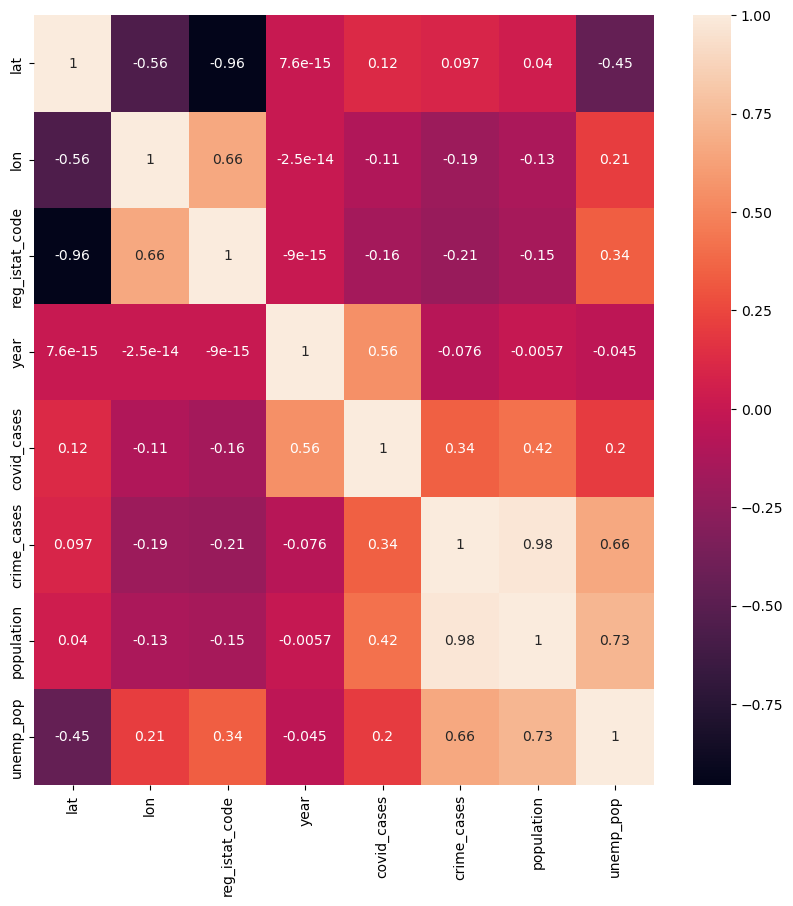

In [425]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
df_encoded = pd.get_dummies(all_data)
correlation_matrix_encoded = df_encoded.corr()
correlation_matrix_encoded
# # Visualize the correlation matrix using a heatmap
# plt.figure(figsize=(100,100))
# sns.heatmap(correlation_matrix_encoded, annot=True)
# plt.show()

In [576]:
# Filter data and pivot for 'covid_cases'
covid_cases = all_data[['reg_name', 'year', 'covid_cases']]
covid_cases_pivot = covid_cases.pivot(index='reg_name', columns='year', values='covid_cases')
covid_cases_pivot.columns = [str(year) + '_covid_cases' for year in covid_cases_pivot.columns]

# Filter data and pivot for 'crime_cases'
crime_cases = all_data[['reg_name', 'year', 'crime_cases']]
crime_cases_pivot = crime_cases.pivot(index='reg_name', columns='year', values='crime_cases')
crime_cases_pivot.columns = [str(year) + '_crime_cases' for year in crime_cases_pivot.columns]

# Filter data and pivot for 'population'
population = all_data[['reg_name', 'year', 'population']]
population_pivot = population.pivot(index='reg_name', columns='year', values='population')
population_pivot.columns = [str(year) + '_population' for year in population_pivot.columns]

# Filter data and pivot for 'unemp_pop'
unemp_pop = all_data[['reg_name', 'year', 'unemp_pop']]
unemp_pop_pivot = unemp_pop.pivot(index='reg_name', columns='year', values='unemp_pop')
unemp_pop_pivot.columns = [str(year) + '_unemp_pop' for year in unemp_pop_pivot.columns]

# Join all the pivoted dataframes
pivoted_data = pd.concat([covid_cases_pivot, crime_cases_pivot, population_pivot, unemp_pop_pivot], axis=1).reset_index()
pivoted_data.head()

,reg_name,2017_covid_cases,2018_covid_cases,2019_covid_cases,2020_covid_cases,2021_covid_cases,2017_crime_cases,2018_crime_cases,2019_crime_cases,2020_crime_cases,2021_crime_cases,2017_population,2018_population,2019_population,2020_population,2021_population,2017_unemp_pop,2018_unemp_pop,2019_unemp_pop,2020_unemp_pop,2021_unemp_pop
0,Abruzzo,0,0,0,35314,106573,42847,40038,38381,34250,35324,1313930,1306059,1300645,1293941,1281012,135455,122642,172297,133862,105735
1,Basilicata,0,0,0,10826,36295,13690,13226,13076,12551,12907,566405,562968,558587,553254,545130,57811,73908,54609,54494,44003
2,Calabria,0,0,0,23920,111746,58733,57531,54859,49476,52530,1935097,1924257,1912021,1894110,1860601,377279,435286,385495,316746,343863
3,Campania,0,0,0,189673,583262,217846,217743,211182,182419,202698,5776654,5762889,5740291,5712143,5624260,1156888,1196604,1198998,1049199,1129836
4,Emilia-Romagna,0,0,0,171512,536922,224240,214257,205999,166883,181014,4439768,4445920,4459453,4464119,4438937,276160,285308,269175,285938,267311


### Modelling

In [560]:
model_data = all_data[['reg_name', 'year', 'covid_cases', 'crime_cases', 'population', 'unemp_pop']]
model_data.head()

,reg_name,year,covid_cases,crime_cases,population,unemp_pop
0,Abruzzo,2017,0,42847,1313930,135455
1,Abruzzo,2018,0,40038,1306059,122642
2,Abruzzo,2019,0,38381,1300645,172297
3,Abruzzo,2020,35314,34250,1293941,133862
4,Abruzzo,2021,106573,35324,1281012,105735


In [561]:
#Setting the index as the municipality name.
model_data.set_index('reg_name', inplace=True)
model_data

,year,covid_cases,crime_cases,population,unemp_pop
reg_name,,,,,
Abruzzo,2017,0,42847,1313930,135455
Abruzzo,2018,0,40038,1306059,122642
Abruzzo,2019,0,38381,1300645,172297
Abruzzo,2020,35314,34250,1293941,133862
Abruzzo,2021,106573,35324,1281012,105735
...,...,...,...,...,...
Veneto,2017,0,162365,4883373,314939
Veneto,2018,0,161958,4880936,369898
Veneto,2019,0,162682,4884590,281662


In [562]:
model_data.describe(percentiles= ([0.01,0.10,0.25,0.5,0.75,0.90,0.99]))

,year,covid_cases,crime_cases,population,unemp_pop
count,100.000000,1.000000e+02,100.000000,1.000000e+02,1.000000e+02
mean,2019.000000,8.232849e+04,111079.920000,2.986989e+06,3.184237e+05
std,1.421338,1.835814e+05,105229.851807,2.459472e+06,3.083531e+05
min,2017.000000,0.000000e+00,2999.000000,1.240890e+05,7.300000e+03
1%,2017.000000,0.000000e+00,3195.020000,1.250246e+05,7.945480e+03
10%,2017.000000,0.000000e+00,12137.000000,5.214570e+05,3.695450e+04
25%,2018.000000,0.000000e+00,31687.500000,1.170650e+06,7.595775e+04
50%,2019.000000,0.000000e+00,58132.000000,1.748720e+06,2.567680e+05
75%,2020.000000,8.838600e+04,170002.250000,4.556516e+06,4.616688e+05
90%,2021.000000,2.594032e+05,219960.500000,5.756419e+06,6.746564e+05


### Plotting the Outliers

#### Capping the outliers below 1st to above 99th Percentile

In [564]:
model_data = model_data.copy()
for col in model_data.columns:
    percentiles = model_data[col].quantile([0.01,0.99]).values
    model_data[col][model_data[col] <= percentiles[0]] = percentiles[0]
    model_data[col][model_data[col] >= percentiles[1]] = percentiles[1]

C:\Users\kmedr\AppData\Local\Temp\ipykernel_20840\2962864038.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\kmedr\AppData\Local\Temp\ipykernel_20840\2962864038.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\kmedr\AppData\Local\Temp\ipykernel_20840\2962864038.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\kmedr\AppData\Local\Temp\ipykernel_20840\2962864038.py:5: SettingWithCopyWarning:


A value

In [565]:
model_data.describe(percentiles= ([0.01,0.10,0.25,0.5,0.75,0.90,0.99]))

,year,covid_cases,crime_cases,population,unemp_pop
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02
mean,2019.000000,76612.651641,110985.809412,2.986831e+06,3.184063e+05
std,1.421338,154475.831587,104906.557074,2.458977e+06,3.082775e+05
min,2017.000000,0.000000,3196.980200,1.250339e+05,7.951935e+03
1%,2017.000000,0.000000,3196.999802,1.250340e+05,7.951999e+03
10%,2017.000000,0.000000,12137.000000,5.214570e+05,3.695450e+04
25%,2018.000000,0.000000,31687.500000,1.170650e+06,7.595775e+04
50%,2019.000000,0.000000,58132.000000,1.748720e+06,2.567680e+05
75%,2020.000000,88386.000000,170002.250000,4.556516e+06,4.616688e+05
90%,2021.000000,259403.200000,219960.500000,5.756419e+06,6.746564e+05


### Plotting the Outliers

In [566]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, subplot_titles=('Covid 19 Cases', 'Crime Cases', 'Population', 'Unemployment'))

# Add box plots
fig.add_trace(go.Box(x=model_data['covid_cases'], name=''), row=1, col=1)
fig.add_trace(go.Box(x=model_data['crime_cases'], name=''), row=1, col=2)
fig.add_trace(go.Box(x=model_data['population'], name=''), row=2, col=1)
fig.add_trace(go.Box(x=model_data['unemp_pop'], name=''), row=2, col=2)

# Add title for the whole figure
fig.update_layout(
    title_text="Distribution of the Data",
    height=1000, width=1200, showlegend=False
    )

fig.show()

Dataset looks much better now as the 99th percentile and max values are not too far. We can now proceed towards Modelling.

Dataset looks much better now as the 99th percentile and max values are not too far. We can now proceed towards Modelling.

## Modelling Using Kmeans Clustering

#### Scale the Data

In [460]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#scaler = StandardScaler()
scaler = MinMaxScaler()
model_data_Scaled = scaler.fit_transform(model_data)
model_data_Scaled

array([[0.00000000e+00, 8.79600630e-02, 1.20263004e-01, 1.07266915e-01],
       [0.00000000e+00, 8.17285449e-02, 1.19466811e-01, 9.64874798e-02],
       [0.00000000e+00, 7.80526369e-02, 1.18919157e-01, 1.38261681e-01],
       [5.46842439e-02, 6.88883787e-02, 1.18241013e-01, 1.05926741e-01],
       [1.65029844e-01, 7.12709527e-02, 1.16933177e-01, 8.22638082e-02],
       [0.00000000e+00, 2.32778366e-02, 4.46469745e-02, 4.19458785e-02],
       [0.00000000e+00, 2.22484936e-02, 4.42993041e-02, 5.54881061e-02],
       [0.00000000e+00, 2.19157319e-02, 4.38561432e-02, 3.92520715e-02],
       [1.67642189e-02, 2.07510658e-02, 4.33166826e-02, 3.91553232e-02],
       [5.62033367e-02, 2.15408204e-02, 4.24948979e-02, 3.03293613e-02],
       [0.00000000e+00, 1.23201749e-01, 1.83097266e-01, 3.10710764e-01],
       [0.00000000e+00, 1.20535219e-01, 1.82000744e-01, 3.59511409e-01],
       [0.00000000e+00, 1.14607623e-01, 1.80763009e-01, 3.17622793e-01],
       [3.70404688e-02, 1.02665913e-01, 1.78951219e

In [462]:
# Checking the dataset post scaling
model_data_Scaled = pd.DataFrame(model_data_Scaled, columns=model_data.columns, index=model_data.index)
model_data_Scaled.head()

,covid_cases,crime_cases,population,unemp_pop
reg_name,,,,
Abruzzo,0.000000,0.087960,0.120263,0.107267
Abruzzo,0.000000,0.081729,0.119467,0.096487
Abruzzo,0.000000,0.078053,0.118919,0.138262
Abruzzo,0.054684,0.068888,0.118241,0.105927
Abruzzo,0.165030,0.071271,0.116933,0.082264


#### Importing required Libraries for Clustering

In [464]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### Function to Calculate Hopkins Statistics

In [465]:
#Calculating the Hopkins Statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

#### Function to run Kmeans Clustering for each of the Pillars

In [568]:
def Cluster_kmeans(df):
    # Filter warnings
    warnings.filterwarnings("ignore")
    
    print("\nHopkins Statistics for this Pillar is",hopkins(df))
    
    #Finding Optimum number of Clusters
    print("\nFinding Optimum number of Clusters")
    #___________Elbow Curve Method (SSD)___________#
    print("\n___________Elbow Curve Method (SSD)___________")
    ssd = []
    for num_clusters in range(2,11):
        kmeans = KMeans(n_clusters=num_clusters, max_iter=50, n_init=10)
        kmeans.fit(df)
        ssd.append([num_clusters,kmeans.inertia_])
    temp = pd.DataFrame(ssd)
    plt.title('Elbow Curve Method')
    plt.xlabel('No. of Clusters')
    plt.ylabel('SSD')
    plt.plot(temp[0],temp[1])
    plt.show()
    
    #___________Silhouette Analysis___________#
    print("\n___________Silhouette Analysis___________")
    sa = []
    for num_clusters in range(2,11):
        kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
        kmeans.fit(df)
        sa.append([num_clusters,silhouette_score(df,kmeans.labels_)])
    temp = pd.DataFrame(sa)
    plt.title('Silhouette Analysis')
    plt.xlabel('No. of Clusters')
    plt.ylabel('Silhouette Score')
    print()
    plt.plot(temp[0], temp[1])
    plt.show()
    
    # Modelling
    kmeans = KMeans(n_clusters=4, random_state=50)
    kmeans.fit(df)
    
    #Printing Labels
    print("\nCluster Labels are:")
    print(kmeans.labels_)
    
    # assign the label
    df['Cluster_Id'] = kmeans.labels_
    
    #Cluster Profiling
    print("\nFollowing are the Cluser groups within the dataset:")
    print(df['Cluster_Id'].value_counts())
    
    # Return the warning filter to its default state
    warnings.filterwarnings("default")

#### Clustering


Hopkins Statistics for this Pillar is 0.9163109480638253

Finding Optimum number of Clusters

___________Elbow Curve Method (SSD)___________


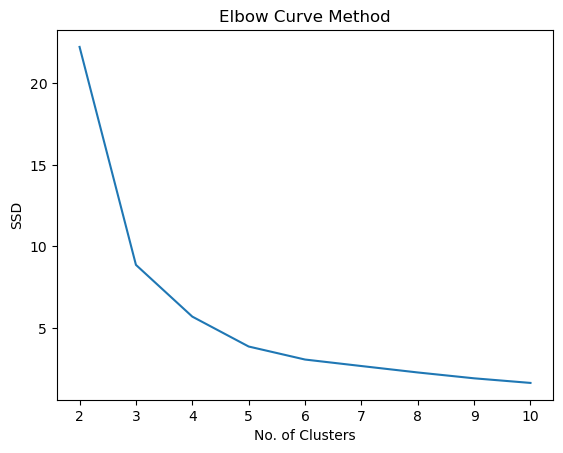


___________Silhouette Analysis___________



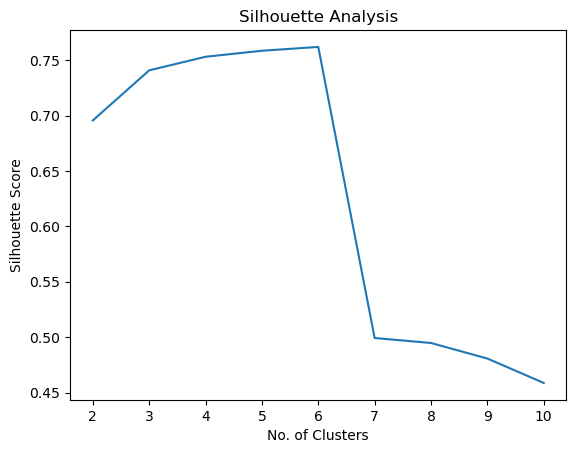


Cluster Labels are:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 3 1 1 1 1 3 0 0 0 0 0 1 1 1 1 3 0 0
 0 0 0 1 1 1 3 3 0 0 0 0 0 0 0 0 0 0 1 1 1 1 3 1 1 1 1 3 0 0 0 0 0 2 2 2 2
 3 1 1 1 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 3]

Following are the Cluser groups within the dataset:
Cluster_Id
0    55
1    27
3    10
2     8
Name: count, dtype: int64


In [569]:
Cluster_kmeans(model_data_Scaled)

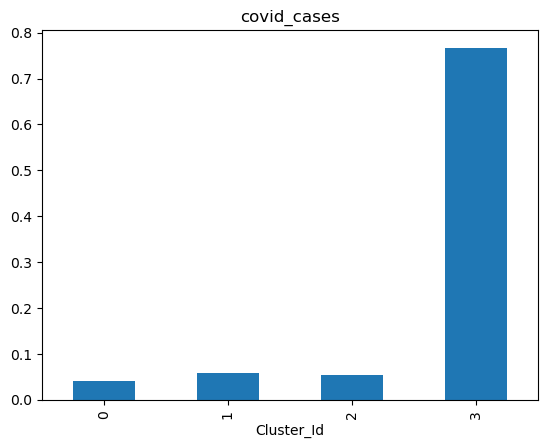

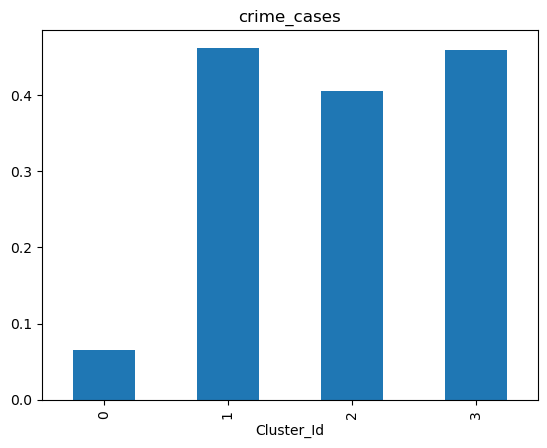

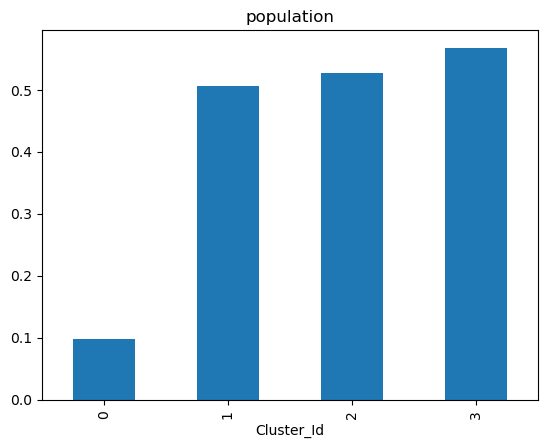

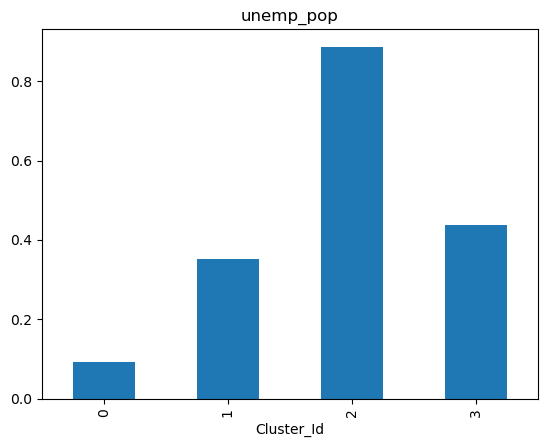

In [570]:
for col in model_data_Scaled.columns.drop('Cluster_Id'):
    model_data_Scaled[col].groupby(model_data_Scaled['Cluster_Id']).mean().plot(kind = 'bar')
    plt.title(col)
    plt.show()

In [571]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X = model_data_Scaled.drop('crime_cases', axis=1)
y = model_data_Scaled['crime_cases']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(f"Linear Regression MSE: {mean_squared_error(y_test, y_pred_lr)}")

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f"Random Forest MSE: {mean_squared_error(y_test, y_pred_rf)}")

Linear Regression MSE: 0.0018171322220611244
Random Forest MSE: 0.0008442969745284364


In [572]:
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Separate features and target
X = model_data_Scaled.drop('crime_cases', axis=1)
y = model_data_Scaled['crime_cases']

# Number of bootstrap samples to create
n_iterations = 1000

# To store the scores
rf_mse_scores = []

# For each bootstrap iteration
for i in range(n_iterations):
    # Create a bootstrap sample
    X_sample, y_sample = resample(X, y, replace=True, random_state=i)

    # Train a model and calculate MSE
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_sample, y_sample)
    y_pred = rf.predict(X_sample)
    mse = mean_squared_error(y_sample, y_pred)
    rf_mse_scores.append(mse)

# Convert the scores to a numpy array
rf_mse_scores = np.array(rf_mse_scores)

# Calculate the mean and standard deviation of the MSE scores
mse_mean = rf_mse_scores.mean()
mse_std = rf_mse_scores.std()

print(f'MSE scores for Random Forest: mean = {mse_mean:.3f}, std = {mse_std:.3f}')


MSE scores for Random Forest: mean = 0.000, std = 0.000


In [573]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X = model_data_Scaled.drop('crime_cases', axis=1)
y = model_data_Scaled['crime_cases']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(f"Linear Regression MSE: {mean_squared_error(y_test, y_pred_lr)}")

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f"Random Forest MSE: {mean_squared_error(y_test, y_pred_rf)}")

Linear Regression MSE: 0.0018171322220611244
Random Forest MSE: 0.0008442969745284364


In [575]:
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Separate features and target
X = model_data_Scaled.drop('crime_cases', axis=1)
y = model_data_Scaled['crime_cases']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Number of bootstrap samples to create
n_iterations = 1000

# To store the scores
rf_mse_scores = []

# For each bootstrap iteration
for i in range(n_iterations):
    # Create a bootstrap sample
    X_sample, y_sample = resample(X_train, y_train, replace=True, random_state=i)

    # Train a model and calculate MSE
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_sample, y_sample)
    y_pred = rf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rf_mse_scores.append(mse)

# Convert the scores to a numpy array
rf_mse_scores = np.array(rf_mse_scores)

# Calculate the mean and standard deviation of the MSE scores
mse_mean = rf_mse_scores.mean()
mse_std = rf_mse_scores.std()

print(f'MSE scores for Random Forest: mean = {mse_mean:.3f}, std = {mse_std:.3f}')


MSE scores for Random Forest: mean = 0.002, std = 0.002


In [162]:
print(geo_df.to_json())

{"type": "FeatureCollection", "features": [{"id": "12", "type": "Feature", "properties": {"reg_name": "Abruzzo", "reg_istat_code": 13}, "geometry": {"type": "Polygon", "coordinates": [[[13.94101515669948, 41.68797275723309], [14.018726573962978, 41.68210608057043], [14.069570906247815, 41.73722538140892], [14.094395808401348, 41.73794486503715], [14.107196496103194, 41.70735888653788], [14.121930654752562, 41.74648093218475], [14.158677477034757, 41.7470247460115], [14.171834052439504, 41.76577425554542], [14.19417740786736, 41.74814438688142], [14.201914373000667, 41.76699500026422], [14.171455043823707, 41.778436300210885], [14.147157882335584, 41.82729732114636], [14.216626657870696, 41.85343789837582], [14.284195833620307, 41.91077791500497], [14.323887061145722, 41.896292202691875], [14.34300592252834, 41.862521440314566], [14.376675708666331, 41.8799287314786], [14.442328674146063, 41.84125562553936], [14.454787894399331, 41.76335504677894], [14.489545167350244, 41.76096985888263

In [156]:
all_df_unique = all_data.groupby('reg_name')[['year', 'reg_istat_code']].first()
all_df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Abruzzo to Veneto
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   year            20 non-null     int64
 1   reg_istat_code  20 non-null     int64
dtypes: int64(2)
memory usage: 480.0+ bytes


In [157]:
geo_df_unique = geo_df.groupby('reg_name')[['reg_istat_code', 'geometry']].first()
geo_df_unique.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 20 entries, Abruzzo to Veneto
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   reg_istat_code  20 non-null     int64   
 1   geometry        20 non-null     geometry
dtypes: geometry(1), int64(1)
memory usage: 1.0+ KB


In [158]:
fig = px.choropleth(
    all_data, geojson=geojson_reg, featureidkey='properties.reg_istat_code', 
    locations='reg_code', # column in all_data that matches geojson identifiers
    color='crime_cases',
    hover_name='crime_cases', 
    animation_frame='year', 
    projection='nell hammer'
)

fig.update_layout(
    title='Number of Crime in Italy by Region', 
    margin={'r':0, 't':35, 'l':15, 'b':10}
)

fig.show()

ValueError: Value of 'locations' is not the name of a column in 'data_frame'. Expected one of ['reg_name', 'lat', 'lon', 'reg_istat_code', 'year', 'covid_cases', 'territory_code', 'crime_type', 'crime_cases', 'gender', 'age_class', 'quarter', 'unemployment_rate', 'population', 'unemp_pop'] but received: reg_code

In [ ]:
geo_df['geometry'].plot()

In [ ]:
df_geo.head(1)

In [ ]:
fig = px.choropleth_mapbox(geo_df, geojson=geojson_reg, featureidkey='properties.reg_istat_code',
                        locations='properties.reg_istat_code', color='covid_cases',
                        color_discrete_sequence=px.colors.qualitative.Dark24, center={'lon': 12.5, 'lat': 41.9},
                        mapbox_style='carto-positron', zoom=4.5, opacity=0.8)
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.show()

In [ ]:
# Create the choropleth map
fig = px.choropleth_mapbox(df_geo_cases, geojson=geojson_reg, featureidkey='properties.reg_istat_code',
                        locations='properties.reg_istat_code', color='covid_cases',
                        color_discrete_sequence=px.colors.qualitative.Dark24, center={'lon': 12.5, 'lat': 41.9},
                        mapbox_style='open-street-map', zoom=4.5, opacity=0.8)

# Create the scatter map
scatter_trace = px.scatter_mapbox(covid_reg, lat='lat', lon='lon', 
                                  hover_name='reg_name', hover_data=['month', 'year', 'covid_cases'],
                                  color_discrete_sequence=['red'], zoom=5, height=750, width=1000,
                                  animation_frame='date', size='size', size_max=100,
                                  animation_group='covid_cases').data[0]

# Add scatter map trace to the choropleth map
fig.add_trace(scatter_trace)

# Adjust the map view
fig.update_layout(
    mapbox_style='open-street-map',
    margin={'r':0, 't':0, 'l':0, 'b':0}, 
    mapbox=dict(pitch=60, bearing=30)
    )

fig.update_traces(marker=dict(sizemin=10))  # Set the minimum marker size

fig.show()


In [ ]:
# Modify the size column in the DataFrame
covid_reg['size'] = covid_reg['covid_cases']

fig = px.scatter_mapbox(covid_reg, lat='lat', lon='lon', 
                        hover_name='reg_name', hover_data=['month', 'year', 'covid_cases'],
                        color_discrete_sequence=['red'], zoom=5, height=750, width=1000,
                        animation_frame='date', size='size', size_max=100,
                        animation_group='covid_cases')

# You can adjust the map view
fig.update_layout(
    mapbox_style='open-street-map',
    margin={'r':0, 't':0, 'l':0, 'b':0}, 
    mapbox=dict(pitch=60, bearing=30)
    )

fig.update_traces(marker=dict(sizemin=10))  # Set the minimum marker size

fig.update_geos(projection_type='equirectangular', visible=True, resolution=110)

# fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 100  # Set the frame duration (adjust as needed)

fig.write_html('scatter_mapbox.html')

fig.show()

print(fig.layout)
print(fig.data)
print(fig.frames)

In [ ]:
start_size = 5  # Define the start size for the markers

# Modify the size column in the DataFrame
covid_reg['size'] = covid_reg['covid_cases'] + start_size

fig = px.scatter_mapbox(covid_reg, lat="lat", lon="lon", 
                        hover_name="date", hover_data=["month", "year", "covid_cases"],
                        color_discrete_sequence=["red"], zoom=5, height=750, width=700,
                        animation_frame="day_of_week", size="size", size_max=10,
                        animation_group="covid_cases", range_color=[covid_reg['covid_cases'].min(), covid_reg['covid_cases'].max()])

fig.update_layout(mapbox_style="open-street-map")
# You can adjust the map view
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0}, 
                  mapbox=dict(pitch=60, bearing=30))

fig.update_traces(marker=dict(sizemin=1))  # Set the minimum marker size

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 100  # Set the frame duration (adjust as needed)

fig.show()


In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from matplotlib.animation import FuncAnimation

fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set up map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.LAND, color='lightgray')

# Retrieve latitude and longitude coordinates from the dataframe
latitudes = covid_reg['lat'].values
longitudes = covid_reg['lon'].values

# Calculate the range of latitudes and longitudes
min_lat, max_lat = latitudes.min(), latitudes.max()
min_lon, max_lon = longitudes.min(), longitudes.max()

# Create a grid for the map
x = np.linspace(min_lon, max_lon, 360)
y = np.linspace(min_lat, max_lat, 180)
X, Y = np.meshgrid(x, y)

def update_plot(index):
    ax.clear()

    # Get the unique combinations of reg_name and year
    unique_combinations = covid_reg[['reg_name', 'year']].drop_duplicates()

    # Filter data for the specific combination of reg_name and year
    reg_name = unique_combinations['reg_name'].iloc[index]
    year = unique_combinations['year'].iloc[index]
    filtered_df = covid_reg[(covid_reg['reg_name'] == reg_name) & (covid_reg['year'] == year)]

    # Calculate total cases sum
    total_cases_sum = filtered_df['covid_cases'].sum()

    # Create a grid of total cases for each point on the map
    cases_grid = np.zeros_like(X)
    latitudes = filtered_df['lat'].values
    longitudes = filtered_df['lon'].values
    for lat, lon in zip(latitudes, longitudes):
        lat_index = int((lat - min_lat) / (max_lat - min_lat) * 179)
        lon_index = int((lon - min_lon) / (max_lon - min_lon) * 359)
        cases_grid[lat_index, lon_index] = covid_cases_sum

    # Plotting the map with total cases data
    ax.imshow(cases_grid, extent=[min_lon, max_lon, min_lat, max_lat], origin='lower', cmap='Reds', vmin=0, vmax=cases_grid.max())

    # Setting plot title
    ax.set_title(f'Total Cases - Year {year}')

animation = FuncAnimation(fig, update_plot, frames=len(covid_reg['year'].unique()), interval=1000)

# Assign the animation to a variable
anim = animation

# Display the animation
plt.show()



In [ ]:
plot_time_series(covid_reg)

In [ ]:
def update_plot(frame):
    ax.clear()
    
    # Get the unique combinations of reg_name and year
    unique_combinations = covid_reg[['reg_name', 'year']].drop_duplicates()

    # Filter data for the specific combination of reg_name and year
    reg_name = unique_combinations['reg_name'].iloc[frame]
    year = unique_combinations['year'].iloc[frame]
    filtered_df = covid_reg[(covid_reg['reg_name'] == reg_name) & (covid_reg['year'] == year)]

    # Calculate total cases sum
    total_cases_sum = filtered_df['covid_cases'].sum()

    # Plotting
    plt.bar(reg_name, total_cases_sum)
    plt.xlabel('Region')
    plt.ylabel('Total Cases')
    plt.title(f'Total Cases - Year {year}')
    plt.xticks(rotation=45)

fig, ax = plt.subplots()
animation = FuncAnimation(fig, update_plot, frames=len(covid_reg['year'].unique()), interval=1000)

plt.show()


In [ ]:
covid_reg.describe()

In [ ]:
covid_reg.groupby('reg_name', as_index=False).agg({'covid_cases': 'max'})

In [ ]:
# set style and figure size
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# plot bar chart and set title and axis labels
sns.barplot(data=covid_reg, x='reg_name', y='covid_cases', ax=ax) # Change colors using palette - 'palette='crest''
plt.title('Covid 19 Cases by Region', fontsize=16)
ax.set_xlabel('Italian Regions')
ax.set_ylabel('Covid Cases')
plt.xticks(rotation=45, ha='right') # ha = horizontal alignment

plt.show()

In [ ]:
# set style and figure size
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# plot bar chart and set title and axis labels
sns.barplot(data=covid_reg, x='reg_name', y='covid_cases', ax=ax)
plt.title('Covid 19 Cases by Region', fontsize=16)
ax.set_xlabel('Italian Regions')
ax.set_ylabel('Covid Cases')
plt.xticks(rotation=45, ha='right') # ha = horizontal alignment

# add labels to each bar
y_ticks = np.arange(0, df['covid_cases'].max()+1, 500000)
ax.set_yticks(y_ticks)
ax.set_yticklabels(['{:,.0f}'.format(y) for y in y_ticks])

# set color of each bar based on its height
max_cases = df['covid_cases'].max()
start_color = '#9FC5E8' # light shade of blue
end_color = '#0B5394' # dark shade of blue
color_map = colors.LinearSegmentedColormap.from_list('custom', [start_color, end_color], N=max_cases)

# loop through each bar
for patch in ax.patches:
    value = patch.get_height()
    # set color based on the normalized height (between 0 and 1)
    color = color_map(value / max_cases)
    patch.set_facecolor(color)

# add color bar
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
cbar = fig.colorbar(cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=max_cases), cmap=color_map), cax=cbar_ax)
cbar.set_label('Covid Cases')

plt.show()

In [ ]:
# Create a subplot with 1 row and 2 columns
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Covid 19 Cases by Region", "Region with Highest Cases"))

# Add the bar chart to the first subplot
fig.add_trace(go.Bar(x=df2['reg_name'], y=df2['covid_cases'], name='Covid Cases'), row=1, col=1)
fig.update_xaxes(title_text='Italian Regions', tickangle=-45, row=1, col=1)
fig.update_yaxes(title_text='Covid Cases', tickformat=',.0f', row=1, col=1)

# Find the region with the highest covid_cases
region_highest_cases = df2.loc[df2['covid_cases'].idxmax(), 'reg_name']

# Add the choropleth map to the second subplot
fig.add_trace(px.choropleth_mapbox(df2, geojson=regions, locations='reg_name', color='covid_cases',
                                    color_continuous_scale='Blues', mapbox_style='carto-positron',
                                    hover_name='reg_name', hover_data={'covid_cases': ':,'},
                                    title=f'Region with Highest Cases: {region_highest_cases}').data[0], row=1, col=2)

fig.update_layout(height=600, showlegend=False)

fig.show()

In [ ]:
# add data, set style, and figure size
fig = px.bar(df2, x='reg_name', y='covid_cases', title='Covid 19 Cases by Region',
            # set labels names
            labels={'reg_name': 'Italian Regions', 'covid_cases': 'Covid Cases'})
fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_tickformat=',.0f',
    ) # set x-axis tick angle and y-axis tick format
fig.show()

In [ ]:
regions_df.head(1)

In [ ]:
df2.head(1)

In [ ]:
df3 = df2.rename(columns={'reg_name': 'denominazione_regione'})
df3

In [ ]:
# Find the region with the highest covid_cases
region_highest_cases = df3.loc[df3['covid_cases'].idxmax(), 'denominazione_regione']

# Create the bar chart
fig = px.bar(df3, x='denominazione_regione', y='covid_cases', title='Covid 19 Cases by Region',
            labels={'denominazione_regione': 'Italian Regions', 'covid_cases': 'Covid Cases'})
fig.update_layout(xaxis_tickangle=-45, yaxis_tickformat=',.0f')

# Create the choropleth map trace
map_trace = go.Choroplethmapbox(
    geojson=regions,  # Replace with the correct GeoJSON data for Italian regions
    locations=df3['denominazione_regione'],
    z=df3['covid_cases'],
    colorscale='Blues',
    zmin=0,
    zmax=df3['covid_cases'].max(),
    featureidkey='properties.denominazione_regione',  # Specify the property key in the GeoJSON data
    marker_opacity=0.7,
    hovertemplate='<b>%{location}</b><br>Total Cases: %{z:,.0f}',
    colorbar=dict(title='Covid Cases')
)

# Set the layout for the figure
layout = go.Layout(
    title=f'Region with Highest Cases: {region_highest_cases}',
    mapbox=dict(
        center=dict(lat=42.5, lon=12.5),
        zoom=4.5,
        style='carto-positron'
    ),
    height=500
)

# Create the figure and add the map trace
fig_map = go.Figure(data=map_trace, layout=layout)

# Display the figure
fig_map.show()

In [ ]:
# add data, set style, and figure size
fig = px.bar(df2, x='reg_name', y='covid_cases', title='Covid 19 Cases by Region',
            # Change colors using color_discrete_sequence
            color='covid_cases', color_continuous_scale=['#9FC5E8', '#0b5394'],
            # set labels names
            labels={'reg_name': 'Italian Regions', 'covid_cases': 'Covid Cases'},
            # Change hover text with new list
            hover_data={'covid_cases': ':.2f'})

# set marker line width and color
fig.update_traces(marker=dict(line=dict(width=1, color='Gray')))
# set marker angle and opacity
fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_tickformat=',.0f',
    )
fig.show()

In [ ]:
sns.boxplot(data=df2, x='covid_cases')
plt.title('Boxplot of Column Name')

#### Convert date column to `datetime` type

In [ ]:
regions_df2['date'] = pd.to_datetime(regions_df2['date']).dt.date

Lets create two new columns, **month** and **year**.

In [ ]:
regions_df2['year'] = pd.to_datetime(df['date']).dt.year
regions_df2['month'] = pd.to_datetime(df['date']).dt.month
regions_df2

In [ ]:
# set style and figure size
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# plot bar chart and set title and axis labels
sns.barplot(data=regions_df2, x='reg_name', y='covid_cases', ax=ax) # Change colors using palette - 'palette='crest''
plt.title('Covid 19 Cases by Region', fontsize=16)
ax.set_xlabel('Italian Regions')
ax.set_ylabel('Covid Cases')
plt.xticks(rotation=45, ha='right') # ha = horizontal alignment

plt.show()

In [ ]:
# set style and figure size
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# plot bar chart and set title and axis labels
sns.barplot(data=regions_df2, x='reg_name', y='covid_cases', ax=ax)
plt.title('Covid 19 Cases by Region', fontsize=16)
ax.set_xlabel('Italian Regions')
ax.set_ylabel('Covid Cases')
plt.xticks(rotation=45, ha='right') # ha = horizontal alignment

# add labels to each bar
y_ticks = np.arange(0, regions_df2['covid_cases'].max()+1, 500000)
ax.set_yticks(y_ticks)
ax.set_yticklabels(['{:,.0f}'.format(y) for y in y_ticks])

# set color of each bar based on its height
max_cases = regions_df2['covid_cases'].max()
start_color = '#9FC5E8' # light shade of blue
end_color = '#0B5394' # dark shade of blue
color_map = colors.LinearSegmentedColormap.from_list('custom', [start_color, end_color], N=max_cases)

# loop through each bar
for patch in ax.patches:
    value = patch.get_height()
    # set color based on the normalized height (between 0 and 1)
    color = color_map(value / max_cases)
    patch.set_facecolor(color)

# add color bar
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
cbar = fig.colorbar(cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=max_cases), cmap=color_map), cax=cbar_ax)
cbar.set_label('Covid Cases')

plt.show()

In [ ]:
fig = px.bar(regions_df2, x='reg_name', y='covid_cases', title='Covid 19 Cases by Region',
            labels={'region': 'Italian Regions', 'covid_cases': 'Covid Cases'}) # set labels
fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_tickformat=',.0f',
    yaxis_range=[0, regions_df2['covid_cases'].max()+500000]
    ) # set x-axis tick angle and y-axis tick format
fig.show()

In [ ]:
import plotly.express as px

fig = px.bar(regions_df2, x='reg_name', y='covid_cases', title='Covid 19 Cases by Region',
            color='covid_cases', color_continuous_scale=['#9FC5E8', '#0b5394'], labels={'region': 'Italian Regions', 'covid_cases': 'Covid Cases'},
            hover_data={'covid_cases': ':.2f'}) # set labels and hover data

fig.update_traces(marker=dict(line=dict(width=1, color='Gray'))) # set marker line width and color
fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_tickformat=',.0f',
    yaxis_range=[0, regions_df2['covid_cases'].max()+500000]
    ) # set x-axis tick angle and y-axis tick format
fig.show()

In [ ]:
sns.boxplot(data=regions_df2, x='covid_cases')
plt.title('Boxplot of Column Name')

Lets take a look at the **Province** data.

In [ ]:
with open('../../data/Covid/dpc-covid19-ita-province-latest.json') as response:
    provinces = json.load(response)

provinces

Create a dataframe from the `json` file.

In [ ]:
provs_df = pd.DataFrame(provinces)

In [ ]:
provs_df.head()

Translate the column names to English.

In [ ]:
provs_df = provs_df.rename(columns={
    'data': 'date', 'stato': 'state', 'codice_regione': 'reg_code', 'denominazione_regione': 'reg_name',
    'codice_provincia': 'prov_code', 'denominazione_provincia': 'prov_name', 'sigla_provincia': 'prov_abr',
    'totale_casi': 'covid_cases', 'note': 'notes', 'codice_nuts_1': 'nuts_1_code',
    'codice_nuts_2': 'nuts_2_code', 'codice_nuts_3': 'nuts_3_code'
    })
provs_df.head()

Create a new dataframe with only the column names required:  
  
- date
- state
- region_code
- province_code
- province
- lat
- lon
- covid_cases
- nuts_1_code
- nuts_2_code
- nuts_3_code

In [ ]:
provs_df2 = provs_df.drop(columns=[
    'prov_abr', 'notes',
    ])
provs_df2.head()

In [ ]:
provs_covid = provs_df2.drop_duplicates(subset=['prov_code','prov_name'])
provs_covid.to_csv('../../data/Covid/covid-provinces.csv', index=False)

In [ ]:
provs_df2.info()

In [ ]:
provs_df2.describe()

In [ ]:
provs_df2['date'] = pd.to_datetime(provs_df2['date']).dt.date

In [ ]:
# set style and figure size
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# select top 20 provinces by total cases and plot bar chart with updated color palette
top_provs = provs_df2.nlargest(20, 'covid_cases')
sns.barplot(data=top_provs, x='prov_name', y='covid_cases', ax=ax, palette='crest')

# set title and axis labels
plt.title('Covid 19 Cases by Region', fontsize=16)
ax.set_xlabel('Italian Regions')
ax.set_ylabel('Covid Cases')
plt.xticks(rotation=45, ha='right') # ha = horizontal alignment

plt.show()

In [ ]:
# set style and figure size
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# plot bar chart and set title and axis labels
sns.barplot(data=top_provs, x='prov_name', y='covid_cases', ax=ax)
plt.title('Covid 19 Cases by Region', fontsize=16)
ax.set_xlabel('Italian Regions')
ax.set_ylabel('Covid Cases')
plt.xticks(rotation=45, ha='right') # ha = horizontal alignment

# add labels to each bar
y_ticks = np.arange(0, top_provs['covid_cases'].max()+1, 500000)
ax.set_yticks(y_ticks)
ax.set_yticklabels(['{:,.0f}'.format(y) for y in y_ticks])

# set color of each bar based on its height
max_cases = top_provs['covid_cases'].max()
start_color = '#9FC5E8' # light shade of blue
end_color = '#0B5394' # dark shade of blue
color_map = colors.LinearSegmentedColormap.from_list('custom', [start_color, end_color], N=max_cases)

# loop through each bar
for patch in ax.patches:
    value = patch.get_height()
    # set color based on the normalized height (between 0 and 1)
    color = color_map(value / max_cases)
    patch.set_facecolor(color)

# add color bar
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
cbar = fig.colorbar(cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=max_cases), cmap=color_map), cax=cbar_ax)
cbar.set_label('Covid Cases')

plt.show()

In [ ]:
fig = px.bar(top_provs, x='prov_name', y='covid_cases', title='Covid 19 Cases by Region',
            labels={'region': 'Italian Regions', 'covid_cases': 'Covid Cases'}) # set labels
fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_tickformat=',.0f',
    yaxis_range=[0, top_provs['covid_cases'].max()+500000]
    ) # set x-axis tick angle and y-axis tick format
fig.show()

In [ ]:
import plotly.express as px

fig = px.bar(top_provs, x='prov_name', y='covid_cases', title='Covid 19 Cases by Region',
            color='covid_cases', color_continuous_scale=['#9FC5E8', '#0b5394'], labels={'region': 'Italian Regions', 'covid_cases': 'Covid Cases'},
            hover_data={'covid_cases': ':.2f'}) # set labels and hover data

fig.update_traces(marker=dict(line=dict(width=1, color='Gray'))) # set marker line width and color
fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_tickformat=',.0f',
    yaxis_range=[0, top_provs['covid_cases'].max()+500000]
    ) # set x-axis tick angle and y-axis tick format
fig.show()

In [ ]:
sns.boxplot(data=provs_df2, x='covid_cases')
plt.title('Boxplot of Column Name')